When our team was initially presented with this project, we faced challenges in identifying a suitable dataset for our study. We experimented with various alternatives before deciding to carry out comprehensive research to pinpoint a dataset that would be both relevant and valuable for our purposes. Given the global impact of COVID-19, we decided to center our investigation around the pandemic, but not to directly analyze its effects. Instead, we aimed to explore the consequences of the pandemic on another aspect of society, as this approach would allow us to draw intriguing and insightful conclusions.

After much deliberation, we chose to examine crime rates, specifically narrowing our focus to crime in Ireland in order to conduct a more targeted analysis. We discovered a dataset published by the Central Statistics Office (CSO), which was compiled based on reports from An Garda Síochána, the national police service of Ireland. Although the dataset provides reliable and insightful information, there is a limitation associated with it - any crime that involves two offences only records the primary offence (i.e., if a crime involved a burglarly and an assault, only the more severe crime would be recorded and accounted for). Despite this limitation, we are still able to make inferences from the data, however we must note that the data is not entirely representative of all crime in Ireland.

To begin our investigation, we imported the dataset and performed an initial exploration to familiarize ourselves with its contents. This allowed us to gain an understanding of the structure and format of the data, as well as identify any potential issues that might require further attention. By carefully examining the dataset, we were able to develop a comprehensive overview of the information it contained, such as crime types, geographical distribution, and the time periods covered. This in-depth understanding of the dataset enabled us to formulate our research questions and plan the appropriate statistical analyses to answer them.

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
data = pd.read_csv("recorded_crime_ireland.csv")
data.head

<bound method NDFrame.head of                                   STATISTIC Label Quarter   
0       Recorded Crime Offences under Reservation  2003Q1  \
1       Recorded Crime Offences under Reservation  2003Q1   
2       Recorded Crime Offences under Reservation  2003Q1   
3       Recorded Crime Offences under Reservation  2003Q1   
4       Recorded Crime Offences under Reservation  2003Q1   
...                                           ...     ...   
157047  Recorded Crime Offences under Reservation  2022Q3   
157048  Recorded Crime Offences under Reservation  2022Q3   
157049  Recorded Crime Offences under Reservation  2022Q3   
157050  Recorded Crime Offences under Reservation  2022Q3   
157051  Recorded Crime Offences under Reservation  2022Q3   

                       Garda Division   
0       Cavan/Monaghan Garda Division  \
1       Cavan/Monaghan Garda Division   
2       Cavan/Monaghan Garda Division   
3       Cavan/Monaghan Garda Division   
4       Cavan/Monaghan Garda Div

Finding the unique values in the 'Garda Division' column and obtaining a NumPy array containing the distinct Divisions:

In [3]:
data['Garda Division'].unique()

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

To facilitate a better understanding of the dataset, we employed various visualization techniques to represent the information contained within it. By creating a range of graphs, we were able to effectively convey the patterns and trends present in the data. This graphical representation not only aided our comprehension of the dataset, but also allowed us to identify specific areas of interest that warranted further investigation.

One such visualization we created was a histogram illustrating the distribution of crime numbers across different Garda Divisions throughout the entire timeframe encompassed by the dataset. This histogram provided a valuable snapshot of the crime landscape in Ireland, revealing the variation in crime rates among the various divisions. It also enabled us to identify any outliers or unique patterns that might indicate underlying factors influencing crime in specific regions, to help guide our subsequent analysis.

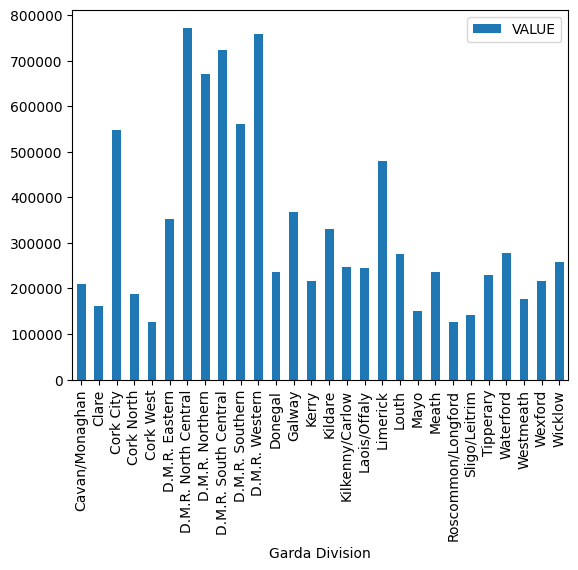

In [4]:
group_data = data.groupby('Garda Division').sum()
group_data.index = group_data.index.str.replace(' Garda Division', '')
group_data.plot(kind='bar', y='VALUE')
plt.xlabel('Garda Division')
plt.show()

In order to gain a deeper understanding of the trends in crime rates, we decided to fit a linear regression model to the data. This statistical method allowed us to examine the relationship between time and crime rates, providing insight into whether crime rates were increasing or decreasing over the years. For this initial analysis, we made the conscious decision to exclude the years affected by the COVID-19 pandemic. By filtering out these years, we aimed to achieve a more accurate representation of the overall dataset, which would serve as a baseline for understanding the typical trends in crime rates. Once we established a solid foundation, we planned to investigate the impact of COVID-19 on crime rates separately at a later stage. After fitting the linear regression model, we were able to identify the direction of the trend in crime rates, as well as the strength and significance of this relationship. This analysis served as a basis for further exploration, such as investigating the specific types of crime that experienced significant changes in their trends and examining potential factors contributing to these changes. By isolating the COVID-19 years and conducting a separate analysis, we ensured that our findings would provide a comprehensive understanding of crime trends in Ireland and the possible influence of the pandemic on these trends.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Filter out 2020 data
data = data[data['Quarter'] != '2020Q1']
data = data[data['Quarter'] != '2020Q2']
data = data[data['Quarter'] != '2020Q3']
data = data[data['Quarter'] != '2020Q4']
group_data = data.groupby('Quarter').sum()
x_data = group_data.index.str.replace('Q', '.').astype(float).values.reshape(-1, 1)
y_data = group_data['VALUE'].values.reshape(-1, 1)
model = LinearRegression().fit(x_data, y_data)


print('Slope: ', model.coef_[0])
print('Intercept: ', model.intercept_)



Slope:  [-1911.00286471]
Intercept:  [3964139.5590923]


Based on the slope calculated above, there is evidently a negative correlation between crime and time. However, as we examined the dataset, we observed that crime rates exhibited considerable fluctuations depending on the quarter. We recognised that linear regression, as a statistical method, might be susceptible to external factors, such as these seasonal variations in crime rates. To account for these fluctuations and improve the accuracy of our analysis, we decided to address the potential impact of seasonality on crime trends and plot the data by quarter, as opposed to by year, and refit the linear regression model.

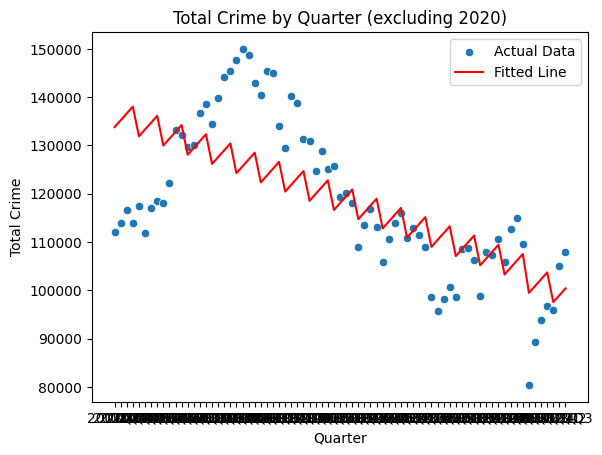

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

group_data = data.groupby('Quarter').sum()
group_data = group_data[group_data.index != '2020Q1']
group_data = group_data[group_data.index != '2020Q2']
group_data = group_data[group_data.index != '2020Q3']
group_data = group_data[group_data.index != '2020Q4']

sns.scatterplot(x=group_data.index, y='VALUE', data=group_data, label='Actual Data')

X = [[int(q[:4]), int(q[5:])] for q in group_data.index]
y = group_data['VALUE']
model = LinearRegression().fit(X, y)

x_pred = [[year, quarter] for year in range(2003, 2023) for quarter in range(1, 5)]
y_pred = model.predict(x_pred)

plt.plot([q for q in group_data.index], model.predict(X), color='red', label='Fitted Line')

# Customize plot labels and title
plt.xlabel('Quarter')
plt.ylabel('Total Crime')
plt.title('Total Crime by Quarter (excluding 2020)')

# Add a legend to the plot
plt.legend()

plt.show()


As seen in the plot above, there is clearly an external factor at play, most likely seasonal fluctuations. We decided to adjust and reduce the examination period from quarterly intervals to annual durations, to aim to eliminate the impact these external factors. We grouped the data by year and summed the values to create a yearly aggregated dataset, with the year 2020 being excluded from the analysis. This change allowed for a more comprehensive and accurate analysis of the data as we were considering a longer time frame, which helped mitigate the influence of short-term variations caused by seasonality. Using the seaborn library, we generated a scatterplot to represent the actual data, while a linear regression model was fitted to the data using scikit-learn, in order to make predictions for the years 2003-2022. The fitted line is plotted on the scatterplot to visualize the relationship between the years and total crime. By analyzing this visualization, we could better understand the underlying trends in crime data, which, in turn, allowed us to make informed decisions based on a holistic view of the data.

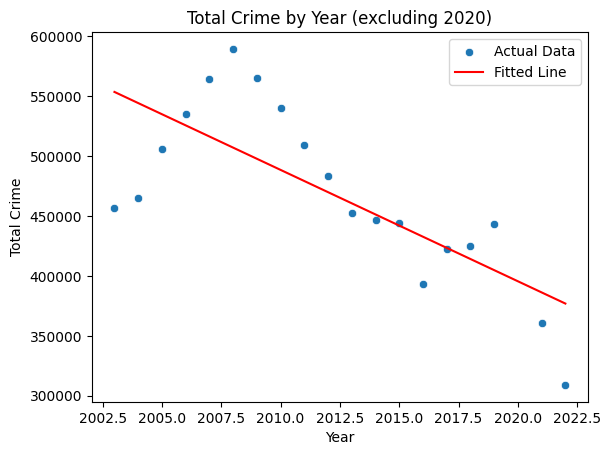

In [7]:
data['Year'] = data['Quarter'].apply(lambda x: int(x[:4]))

group_data = data.groupby('Year').sum()
group_data = group_data[group_data.index != 2020]

sns.scatterplot(x=group_data.index, y='VALUE', data=group_data, label='Actual Data')

X = [[year] for year in group_data.index]
y = group_data['VALUE']
model = LinearRegression().fit(X, y)

x_pred = [[year] for year in range(2003, 2023)]
y_pred = model.predict(x_pred)

plt.plot(x_pred, y_pred, color='red', label='Fitted Line')

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Total Crime by Year (excluding 2020)')

# Add a legend to the plot
plt.legend()
plt.show()

As part of our preliminary examination, we wanted to understand the geographic trends behind the dataset and visualise the information on a map using folium. We mapped the values in our dataset to the values in the GeoJSON file. Black spots on the map represent a lack of data. These black spots may also occur in cases where counties are combined (i.e.,the Roscommon/Longford Garda Division), and the data is only assigned to the larger county for accurate representation.

The first step involved creating a location dictionary:

In [8]:
locations_dict = {
    'Fingal': 'D.M.R. North Central Garda Division',
    'Waterford City': 'Waterford Garda Division',
    'Kerry County': 'Kerry Garda Division',
    'Roscommon County': 'Roscommon/Longford Garda Division',
    'South Dublin': 'D.M.R. Eastern Garda Division',
    'Monaghan County': 'Cavan/Monaghan Garda Division',
    'Laois County': 'Laois/Offaly Garda Division',
    'Wexford County': 'Wexford Garda Division',
    'Limerick City': 'Limerick Garda Division',
    'Westmeath County': 'Westmeath Garda Division',
    'Dublin City': 'D.M.R. Southern Garda Division',
    'Clare County': 'Clare Garda Division',
    'Waterford County': 'Waterford Garda Division',
    'Limerick County': 'Limerick Garda Division',
    'South Tipperary': 'Tipperary Garda Division',
    'Galway City': 'Galway Garda Division',
    'Louth County': 'Louth Garda Division',
    'Kilkenny County': 'Kilkenny/Carlow Garda Division',
    'North Tipperary': 'Tipperary Garda Division',
    'Galway County': 'Galway Garda Division',
    'Kildare County': 'Kildare Garda Division',
    'Cavan County': 'Cavan/Monaghan Garda Division',
    'Leitrim County': 'Sligo/Leitrim Garda Division',
    'Sligo County': 'Sligo/Leitrim Garda Division',
    'Meath County': 'Meath Garda Division',
    'Offaly County': 'Laois/Offaly Garda Division',
    'Wicklow County': 'Wicklow Garda Division',
    'Longford County': 'Roscommon/Longford Garda Division',
    'DÃºn Laoghaire-Rathdown': 'D.M.R. Eastern Garda Division',
    'Donegal County': 'Donegal Garda Division',
    'Mayo County': 'Mayo Garda Division',
    'Carlow County': 'Kilkenny/Carlow Garda Division',
    'Cork City': 'Cork City Garda Division',
    'Cork County': 'Cork North Garda Division'
}


In the next step, we applied a choropleth visualisation technique to represent the crime data on the map. This method involved shading geographical areas based on the values from our dataset, which have been mapped to the corresponding GeoJSON file using the dictionary created. By creating a choropleth map with Folium, we effectively visualised the spatial distribution of crime data and gained a better understanding of the areas with higher or lower crime rates (i.e., Dublin City had very high crime rates, however this was expected due to the high population in the area). This  visualisation became instrumental as we carried on with our study.

In [1]:
import pandas as pd
import folium
import json

data = pd.read_csv('recorded_crime_ireland.csv')
data['Garda Division'] = data['Garda Division'].replace(locations_dict)
area_data = data.groupby('Garda Division')['VALUE'].sum().reset_index()

map = folium.Map(location=[53.5, -8], zoom_start=7)
geojson_data = json.load(open('map.geojson'))

folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=area_data,
    columns=['Garda Division', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime count'
).add_to(map)

folium.LayerControl().add_to(map)
map.save('crime_map.html')


NameError: name 'locations_dict' is not defined

To obtain an overview of the dataset, we obtained the main statistical measures and gained the following insights:
- The mean number of. acrime type committed in a quarter is 59.08, indicating that on average, the value of this variable across all data points is around 59. However, the standard deviation is 150.33, which suggests a relatively high degree of variability within the dataset. This implies that the values are spread out over a wide range and do not cluster closely around the mean.
- The minimum value in the dataset is 0, while the maximum value is 2,563. This wide range reflects a substantial difference between the lowest and highest recorded values, hinting at the presence of outliers or extreme cases.
- The dataset can be further understood by examining the quartiles. The 25th percentile (Q1) is 0, meaning that 25% of the data points have a value of 0. The 50th percentile (Q2), also known as the median, is 4, which indicates that half of the data points have a value of 4 or lower. The 75th percentile (Q3) is 46, meaning that 75% of the data points have a value of 46 or lower. The wide range between the quartiles, particularly between Q1 and Q3, suggests a skewed distribution. 

We decided to investigate the reasoning behind the vast spread of crime counts per quarter. We observed that the dataset contained 71 unique crime types. It appeared that certain crime names often had no associated crimes within a specific quarter, likely due to the highly specific nature of the crime type. Hence, some crime types were so narrowly defined that they occured infrequently or not at all in a given quarter, resulting in a significant portion of the dataset having zero values for those particular crimes. We determined that this was the main contributing factor to the skewed distribution and high variability observed in the dataset.

In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
data = pd.read_csv("recorded_crime_ireland.csv")
data.describe()

VALUE
count  157052.000000
mean       59.076675
std       150.331762
min         0.000000
25%         0.000000
50%         4.000000
75%        46.000000
max      2563.000000

In order to account for the immense variety of distinct crime types, we devised a classification system by creating a dictionary that consolidates related offenses to allow us to better analyse the data. The initial dataset contained a large number of niche crime types, which we recognised as too granular for effective analysis. To address this issue, we grouped crimes that fall under similar categories, allowing for a more streamlined examination of the data.

For example, we combined "Sexual offences", "Rape and sexual assault", and "Other sexual offences" into a single category. By consolidating these types of crimes into more general categories, we could more effectively analyse the data and gain a clearer understanding of broader crime trends and patterns.

In [28]:
crime_dict = {
    'Homicide': ['Homicide offences', 'Murder', 'Manslaughter', 'Infanticide'],
    'Dangerous Driving': ['Dangerous driving leading to death', 'Dangerous driving causing serious bodily harm', 'Driving/in charge of a vehicle while over legal alcohol limit', 'Driving/in charge of a vehicle under the influence of drugs'],
    'Sexual Offences': ['Sexual offences', 'Rape and sexual assault', 'Other sexual offences'],
    'Assault': ['Attempts/threats to murder, assaults, harassments and related offences', 'Murder-attempt', 'Threat to kill or cause serious harm', 'Harassment and related offences', 'Assault causing harm, poisoning', 'Other assault'],
    'Endangerment': ['Endangerment with potential for serious harm/death', 'Unseaworthy/dangerous use of boat or ship', 'Endangering traffic offences'],
    'Child Neglect and Cruelty': ['Abandoning a child, child neglect and cruelty'],
    'Kidnapping': ['Kidnapping and related offences', 'False imprisonment', 'Abduction of person under 16 years of age', 'Human trafficking offences'],
    'Robbery and Extortion': ['Robbery, extortion and hijacking offences', 'Robbery of an establishment or institution', 'Robbery of cash or goods in transit', 'Robbery from the person', 'Blackmail or extortion', 'Carjacking, hijacking/unlawful seizure of aircraft/vessel'],
    'Burglary': ['Burglary and related offences', 'Aggravated burglary', 'Burglary (not aggravated)', 'Possession of an article (with intent to burgle, steal, demand)'],
    'Theft and Handling Stolen Property': ['Theft and related offences', 'Theft/taking of vehicle and related offences', 'Theft from person', 'Theft from shop', 'Other thefts, handling stolen property'],
    'Fraud and Deception': ['Fraud, deception and related offences'],
    'Drug Offences': ['Controlled drug offences', 'Importation of drugs', 'Cultivation or manufacture of drugs', 'Possession of drugs for sale or supply', 'Possession of drugs for personal use', 'Other drug offences'],
    'Weapons and Explosives Offences': ['Weapons and Explosives Offences', 'Explosives, chemical weapons offences', 'Discharging a firearm', 'Possession of a firearm', 'Offensive weapons offences (n.e.c.)', 'Fireworks offences'],
    'Damage to Property and to the Environment': ['Damage to property and to the environment', 'Arson', 'Criminal damage (not arson)', 'Litter offences'],
    'Public Order and Social Code Offences': ['Public order and other social code offences', 'Disorderly conduct', 'Trespass offences', 'Liquor licensing offences', 'Prostitution offences', 'Regulated betting/money, collection/trading offences', 'Social code offences (n.e.c.)'],
    'Offences against Government and Justice Procedures': ['Offences against government, justice procedures and organisation of crime', 'Offences against government and its agents', 'Organisation of crime and conspiracy to commit crime', 'Perverting the course of justice', 'Offences while in custody, breach of court orders']
}

Using the crime dictionary we created, we proceeded to plot histograms of each crime category on a quarterly basis. This approach enabled us to visualise the changes in different types of crime over the specified time frame more effectively. We facilitated the identification of high-level patterns in the data. This method provided a clearer understanding of how crime rates evolved within each category, as well as the relationships between categories. Through this visualisation, we could better recognize potential seasonal influences, the impact of policy changes, or other factors that may have contributed to the trends observed in the data.

It also allowed us to identify areas that warranted further investigation or targeted interventions.

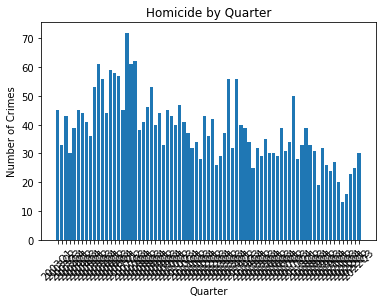

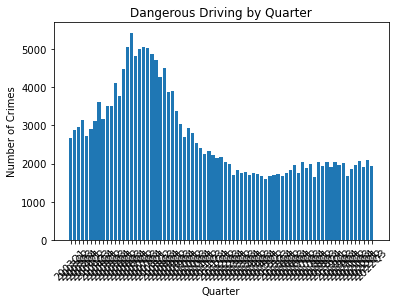

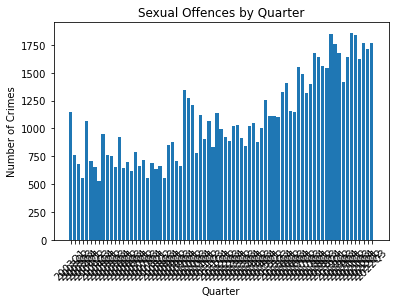

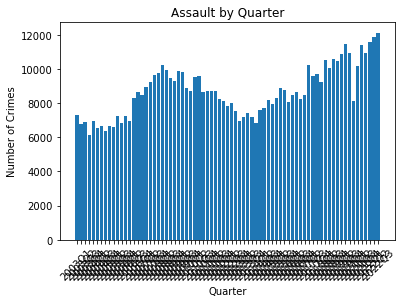

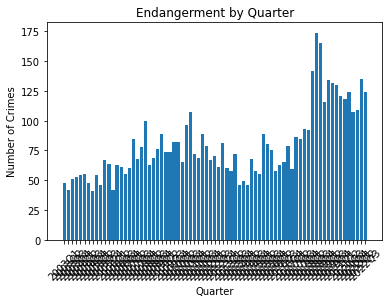

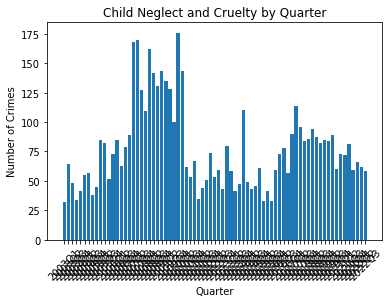

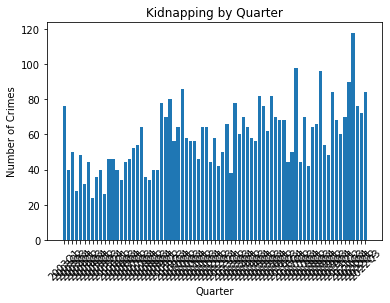

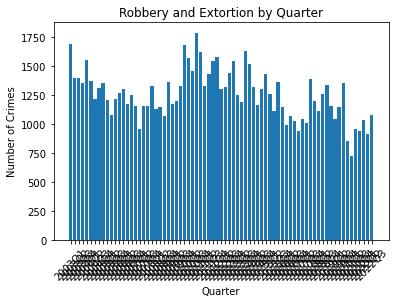

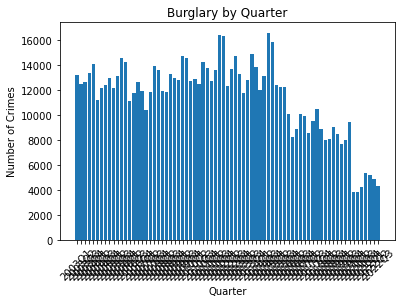

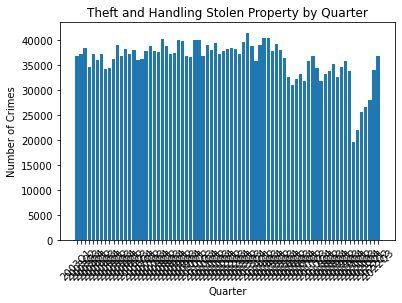

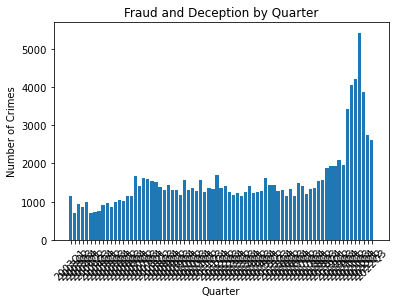

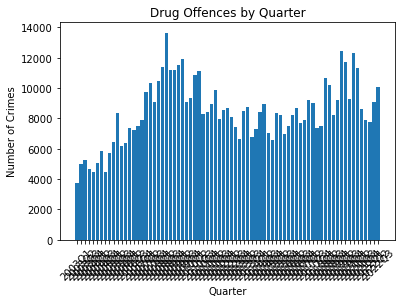

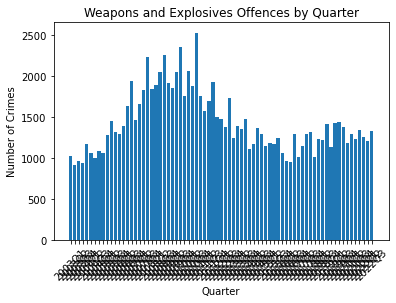

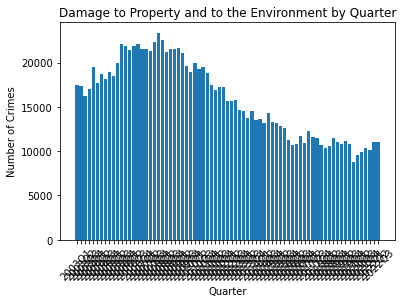

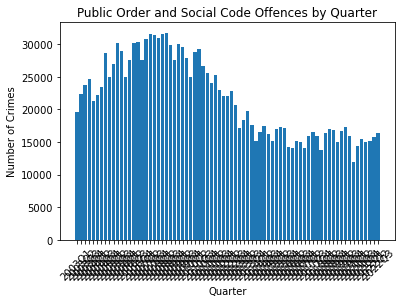

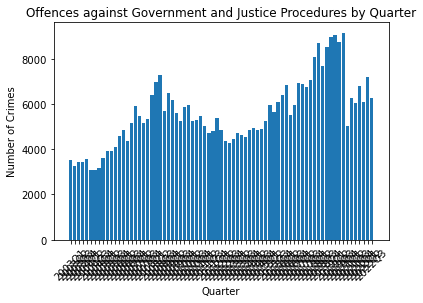

In [29]:
import matplotlib.pyplot as plt
def categorize_offence(offence):
    for category, offences in crime_dict.items():
        if offence in offences:
            return category
    return None
data['Category'] = data['Type of Offence'].apply(categorize_offence)

# Group by 'Category' and 'Quarter', and sum the '# Value' column
grouped_data = data.groupby(['Category', 'Quarter'])['VALUE'].sum().reset_index()

# Plot histograms for each category
for category in crime_dict.keys():
    category_data = grouped_data[grouped_data['Category'] == category]
    
    plt.figure()
    plt.bar(category_data['Quarter'], category_data['VALUE'])
    plt.title(f'{category} by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()

Upon completing the iterative grouping of the consolidated crime categories by quarter, we discovered that seasonal fluctuations made it challenging to pinpoint specific changes in crime patterns over time. To address this issue and gain a clearer understanding of how crime rates evolved, we decided to change our approach.

Instead of focusing on quarterly data, we chose to plot histograms for each crime category against the years. This method allowed us to analyse the data from a broader perspective, aggregating annual trends while reducing the influence of seasonal variations. By doing so, we could more effectively identify long-term shifts and trends in the data.

The histograms provided a concise visual representation of the distribution of each crime category across the years, making it easier to observe any changes or patterns. This new approach facilitated a more accurate understanding of the overall trends in crime types and enabled us to better detect potential factors contributing to these changes over time. The following key takeaways were noted as areas of interest: 

- Throughout the COVID years, we observed significant fluctuations in each crime category. This suggests that the pandemic may have had a considerable impact on criminal activity, and we wanted to investigate this further.
- We noted a sharp decline in Dangerous Driving around 2007, with crime levels in this category remaining low ever since. Further investigation revealed that this decrease could be attributed to the introduction of the 2006 Road Safety Act and the 2009 Road Traffic Act in Ireland. These legislative measures likely contributed to the improvement of road safety and reduction in dangerous driving incidents.
- The crime rates for Child Neglect and Cruelty experienced a drop after 2010; however, levels began to surge again around 2015. This trend suggests that factors influencing this particular crime category may have changed during that period. It could be due to alterations in societal attitudes, changes in policy or enforcement, or other underlying causes that warrant further examination.

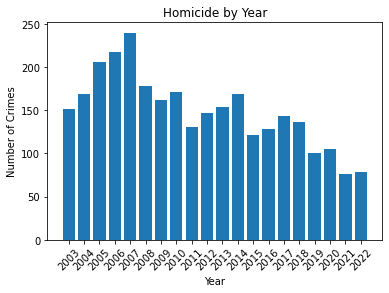

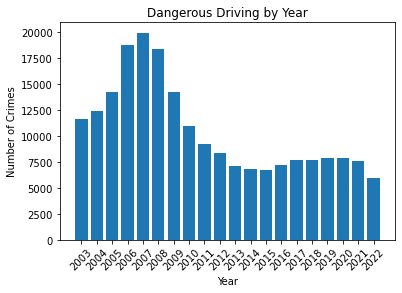

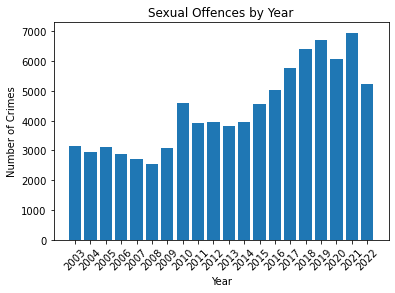

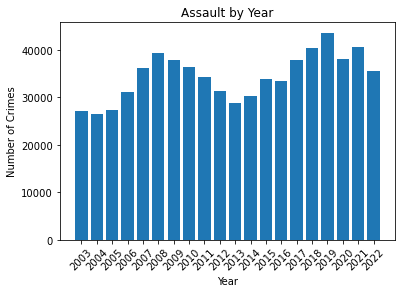

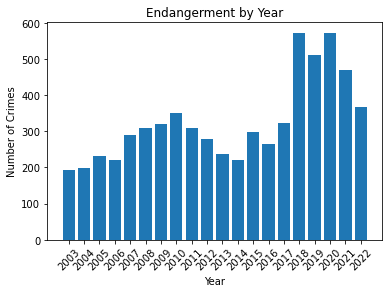

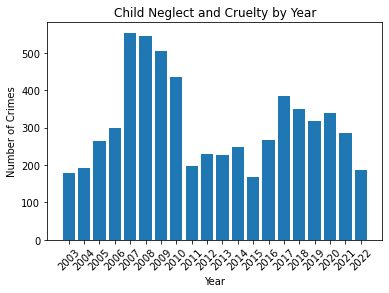

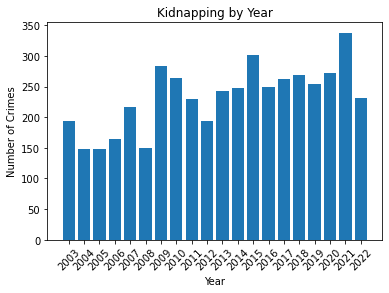

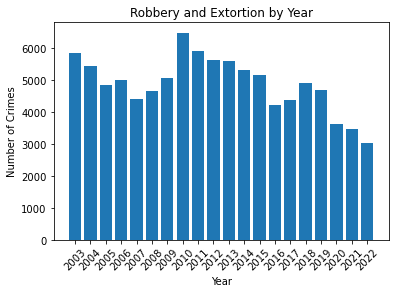

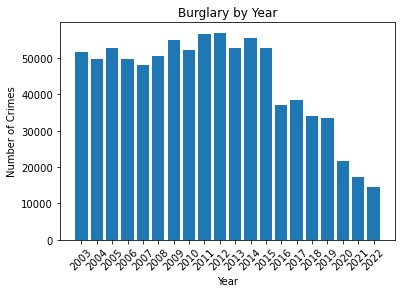

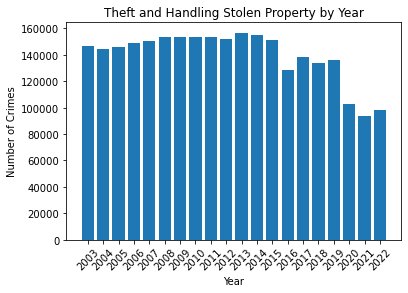

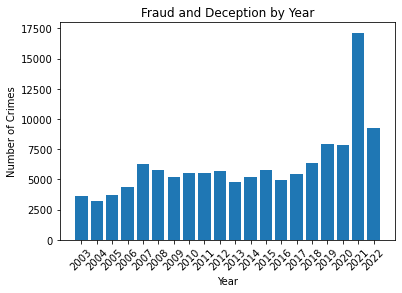

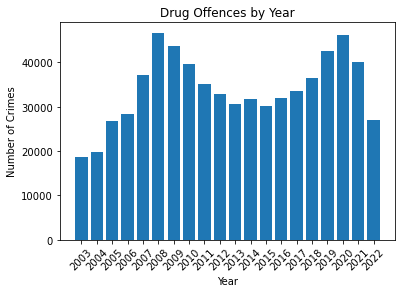

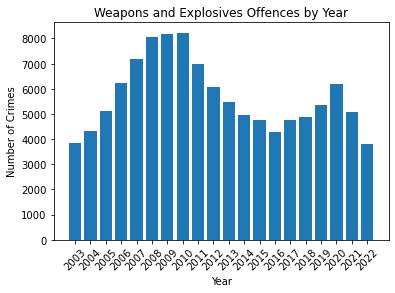

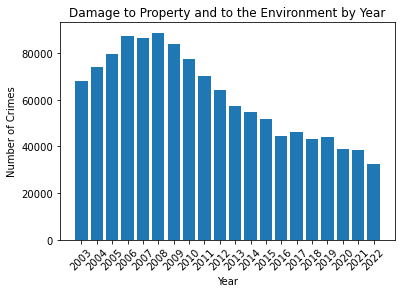

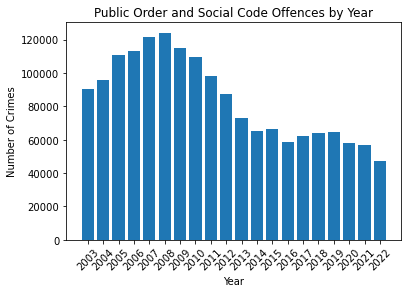

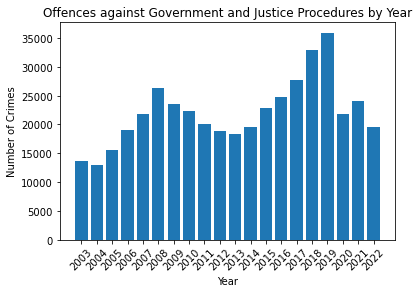

In [32]:
import matplotlib.pyplot as plt

def categorize_offence(offence):
    for category, offences in crime_dict.items():
        if offence in offences:
            return category
    return None

data['Category'] = data['Type of Offence'].apply(categorize_offence)

# Extract the year from the 'Quarter' column when the format is like '2003Q1'
data['Year'] = data['Quarter'].str.extract('(\d{4})Q\d').astype(int)

# Group by 'Category' and 'Year', and sum the '# Value' column
grouped_data = data.groupby(['Category', 'Year'])['VALUE'].sum().reset_index()

# Plot histograms for each category
for category in crime_dict.keys():
    category_data = grouped_data[grouped_data['Category'] == category]
    
    plt.figure()
    plt.bar(category_data['Year'].astype(str), category_data['VALUE'])
    plt.title(f'{category} by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()

Upon observing the fluctuations in crime rates across all categories during the pandemic, we decided to refine our analysis by focusing on the years surrounding this period (2017-2022). By isolating the data for these years, we aimed to better visualise and understand the impact of the pandemic on various types of crime. To achieve this, we created histograms specifically for the years 2017 through 2022, displaying the distribution of each crime category within this time frame.

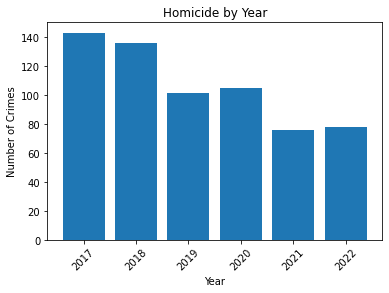

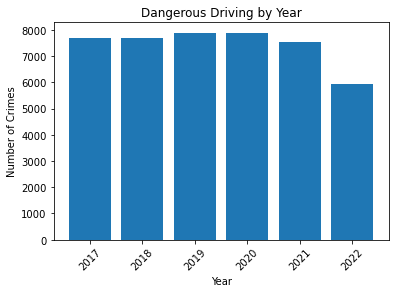

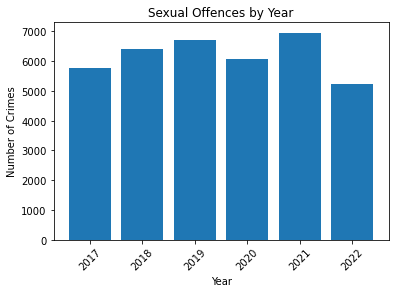

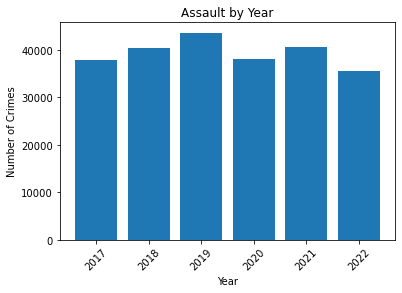

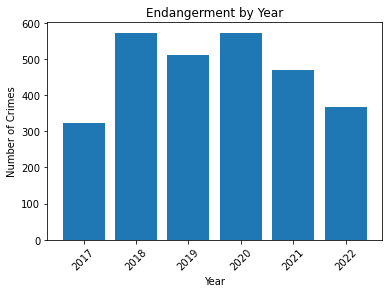

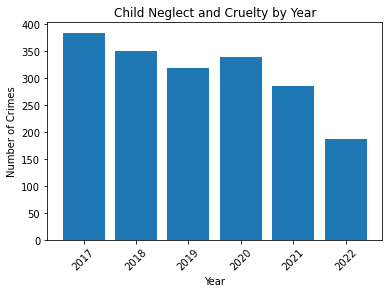

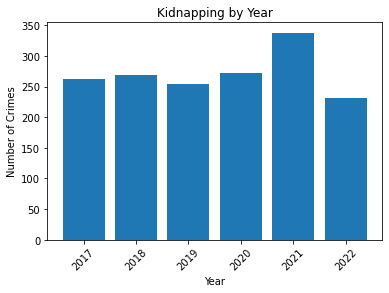

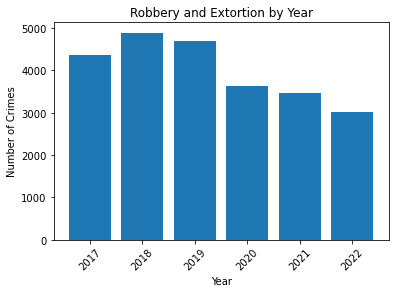

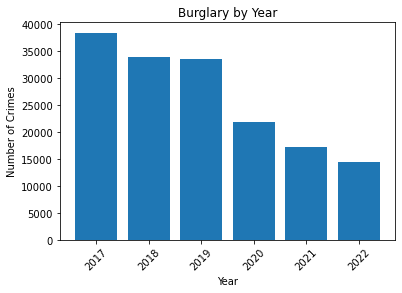

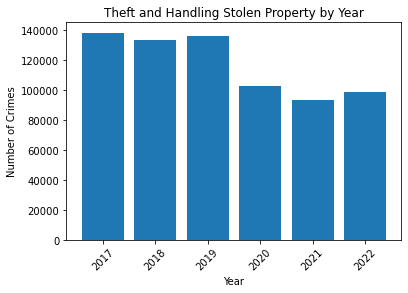

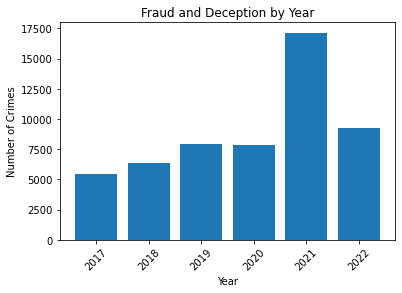

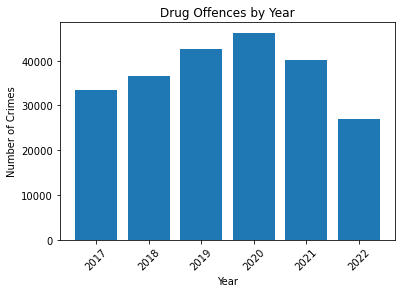

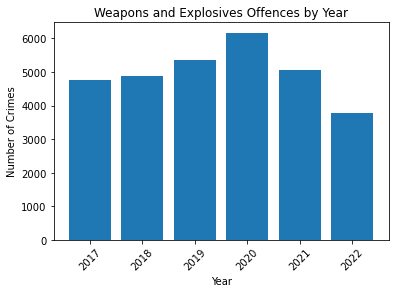

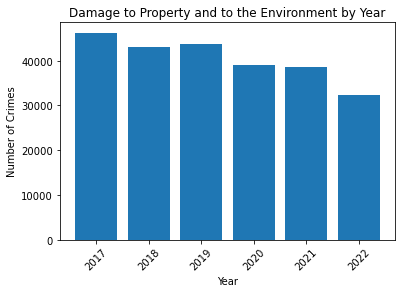

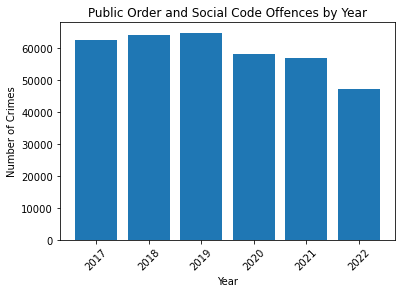

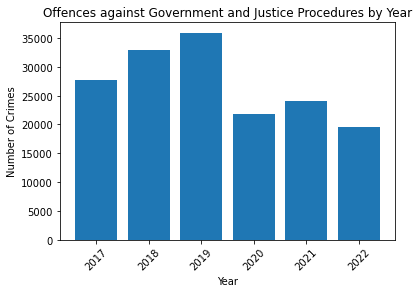

In [33]:
import matplotlib.pyplot as plt

def categorize_offence(offence):
    for category, offences in crime_dict.items():
        if offence in offences:
            return category
    return None

data['Category'] = data['Type of Offence'].apply(categorize_offence)

# Extract the year from the 'Quarter' column when the format is like '2003Q1'
data['Year'] = data['Quarter'].str.extract('(\d{4})Q\d').astype(int)

# Group by 'Category' and 'Year', and sum the '# Value' column
grouped_data = data.groupby(['Category', 'Year']).sum().reset_index()
grouped_data = grouped_data[(grouped_data['Year'] >= 2017) & (grouped_data['Year'] <= 2022)]

# Plot histograms for each category
for category in crime_dict.keys():
    category_data = grouped_data[grouped_data['Category'] == category]
    
    plt.figure()
    plt.bar(category_data['Year'].astype(str), category_data['VALUE'])
    plt.title(f'{category} by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.show()

We generated scatterplots with corresponding lines of best fit to visualise the relationships between different types of crime. By analysing these plots, we were able to determine the correlations between various crime categories and draw several key insights:

- Interestingly, after scanning through the plots, we noted a pronounced negative correlation between Homicide and Fraud rates. Intrigued by this unexpected relationship, we chose to delve deeper into the analysis to qualitatively grasp the rationale behind such a correlation. Upon further examination, we recognised that Homicide and Fraud represent distinctly different categories of crime, each with its own unique characteristics and motivations. Given the disparate nature of these criminal activities, it became increasingly apparent that the correlation we observed might very well be a mere coincidence. Considering the lack of an evident causal relationship between Homicide and Fraud, we concluded that pursuing this line of inquiry might not yield substantial insights or benefits. Consequently, we decided to shift our focus and direct our investigative efforts towards other aspects of criminal behavior that might offer more valuable and actionable findings.
- There was a strong correlation between Assault and Sexual Offences, emphasising the connection between these two categories. This could indicate that environments or situations conducive to one type of crime might also be conducive to the other, or that there may be overlapping factors influencing the occurrence of both crimes. A similar relationship was seen between Kidnapping and Sexual Offences.
- Additionally, we found a strong positive correlation between Drug Offences and Sexual Offences. This suggests that these two types of crime are also influenced by similar factors, such as social or economic conditions, or that one crime might facilitate the occurrence of the other. For example, drug use could impair judgment or reduce inhibitions, leading to an increased likelihood of sexual offences. Conversely, individuals involved in the illegal drug trade might be more likely to engage in sexual offences due to the associated criminal culture or environment.
- As expected, numerous crime categories displayed minimal correlation, such as Dangerous Driving and Fraud. This lack of correlation can be attributed to the fact that these types of crimes are fundamentally different in nature and do not share any significant underlying factors that might influence their occurrence.

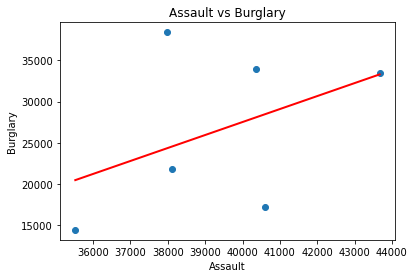

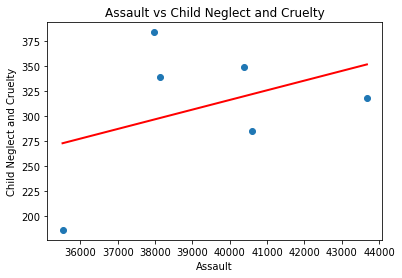

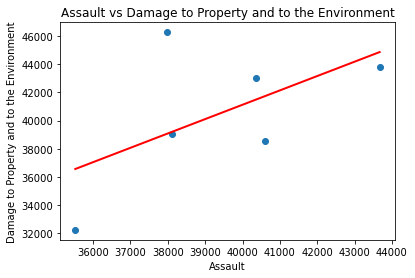

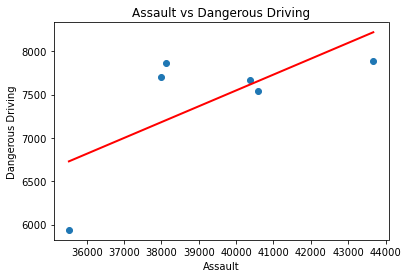

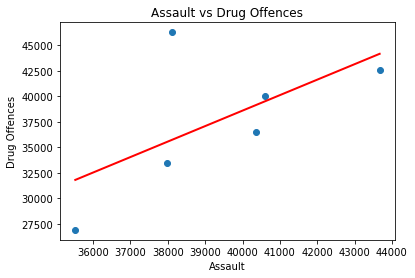

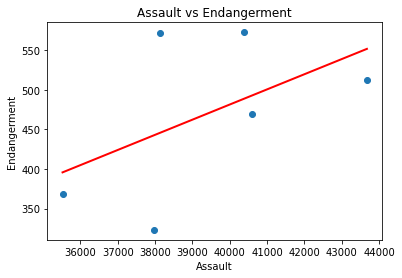

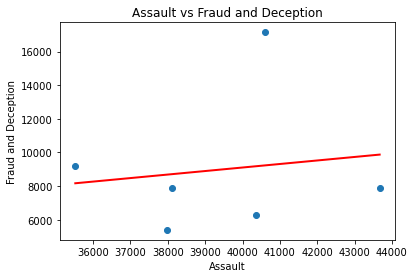

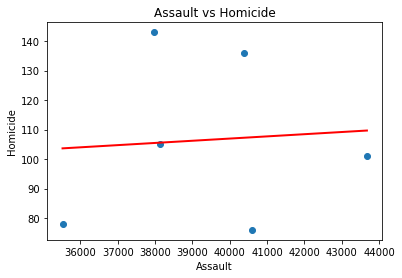

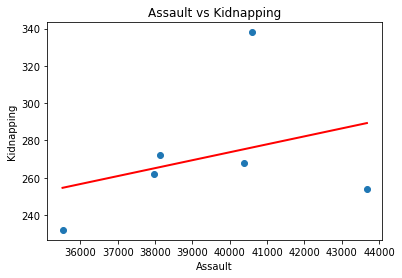

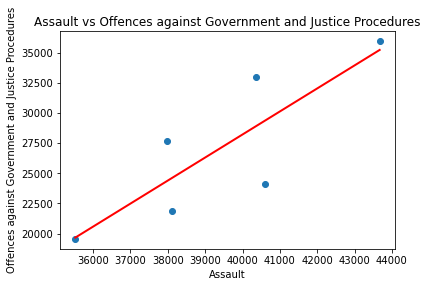

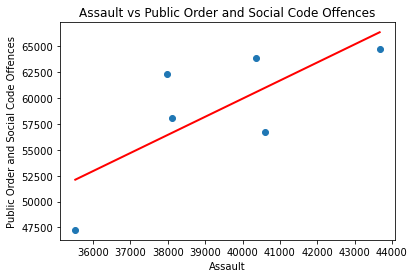

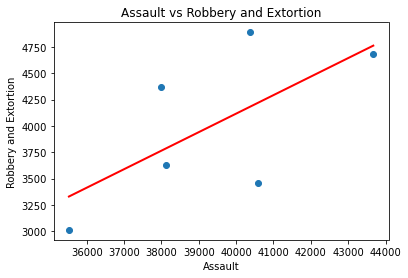

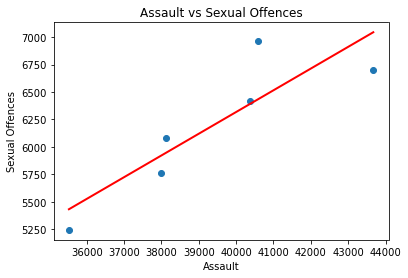

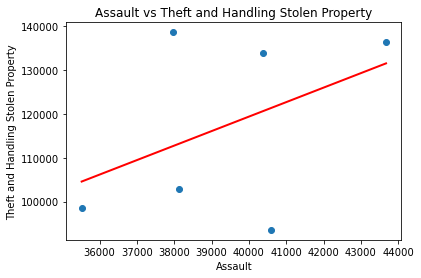

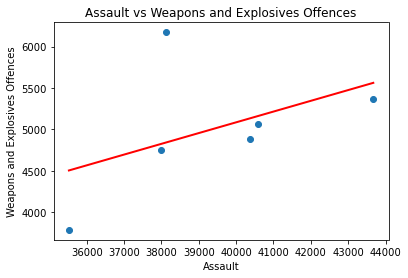

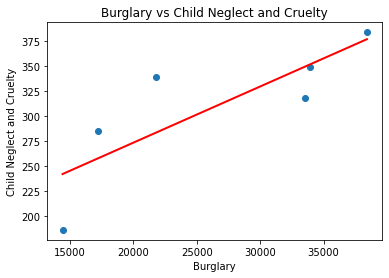

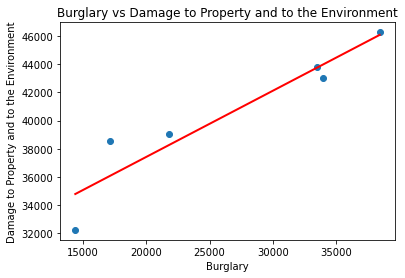

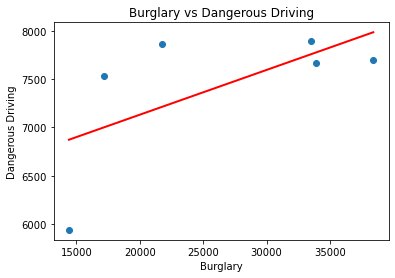

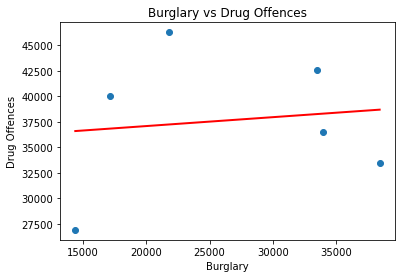

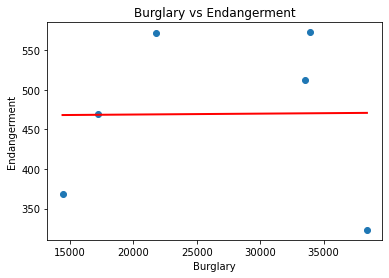

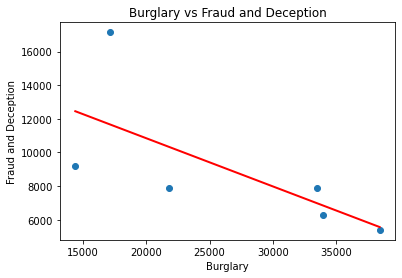

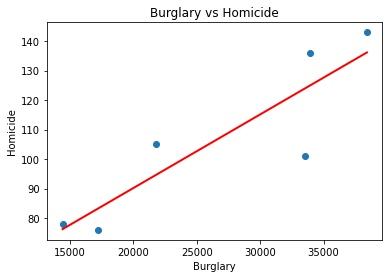

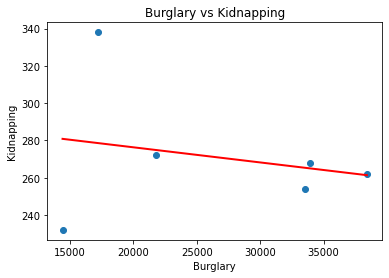

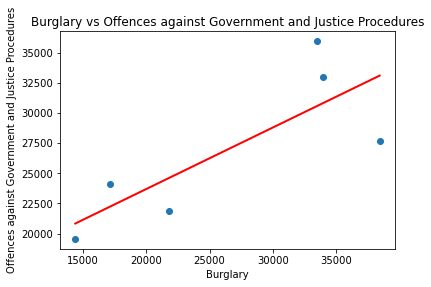

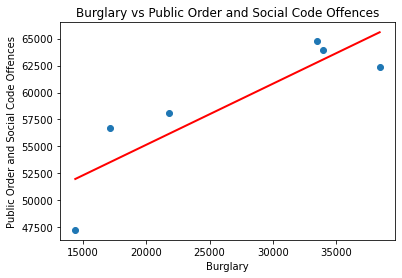

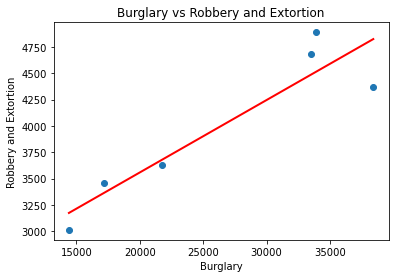

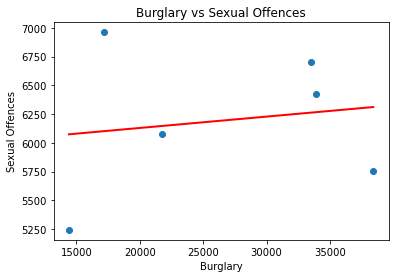

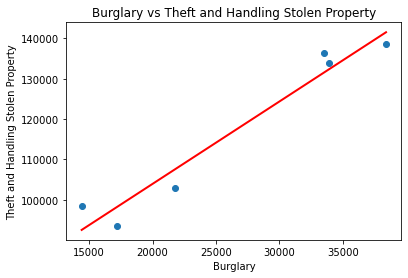

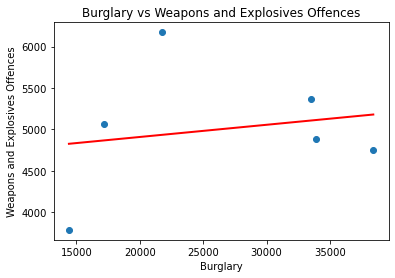

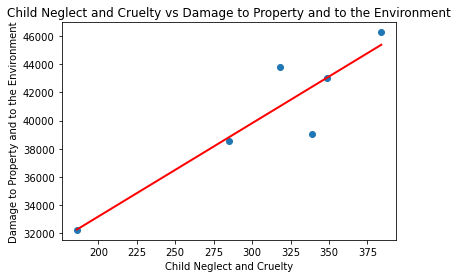

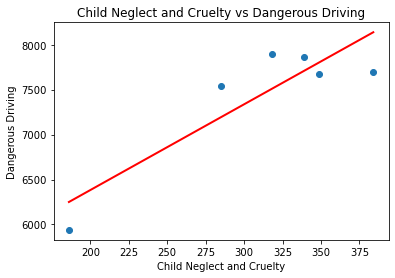

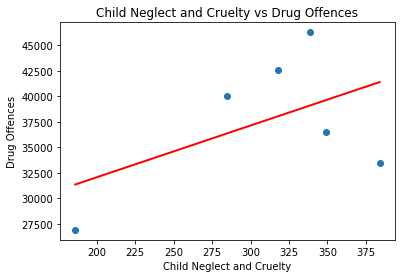

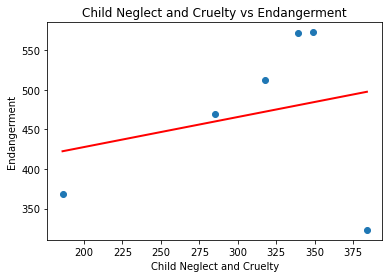

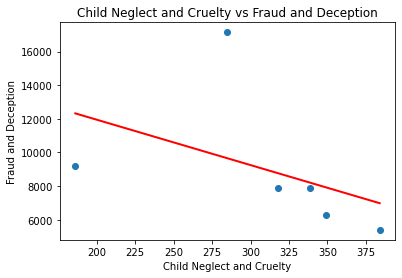

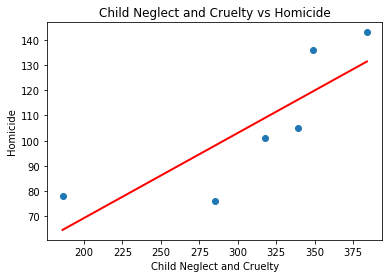

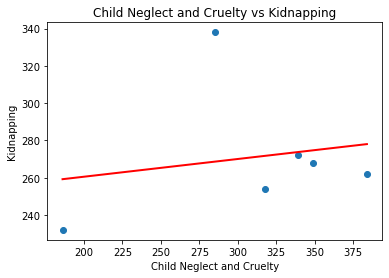

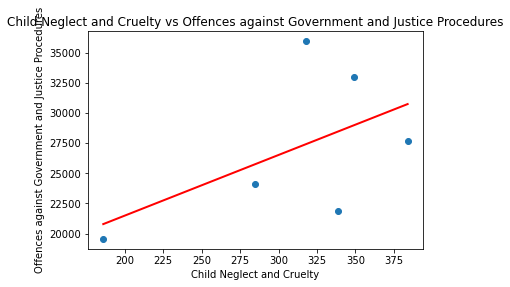

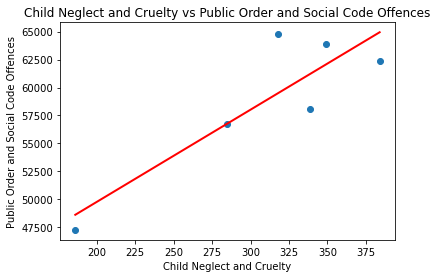

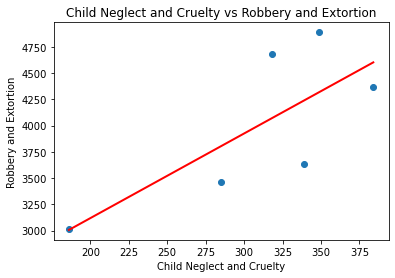

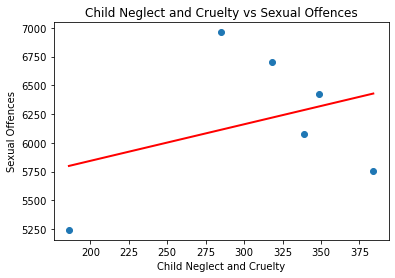

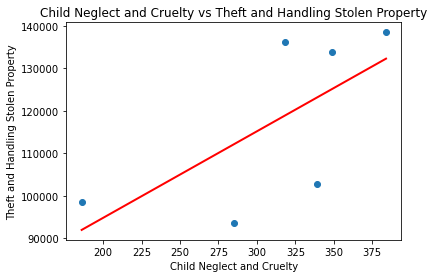

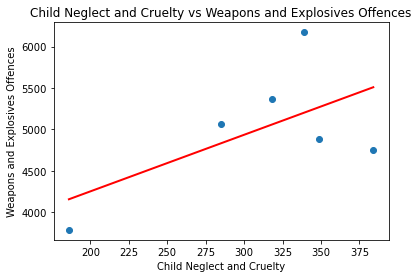

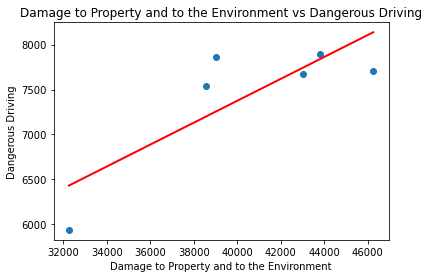

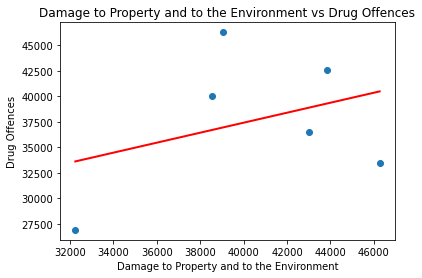

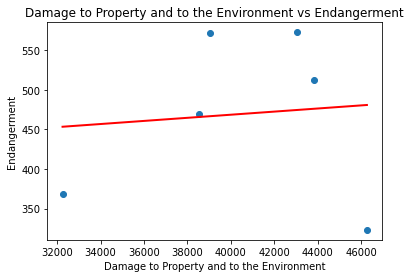

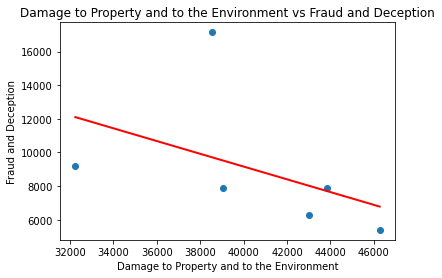

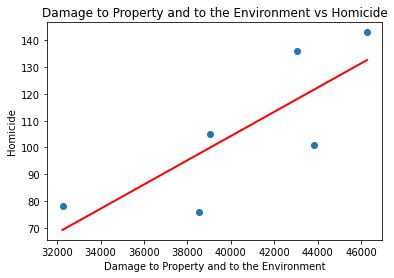

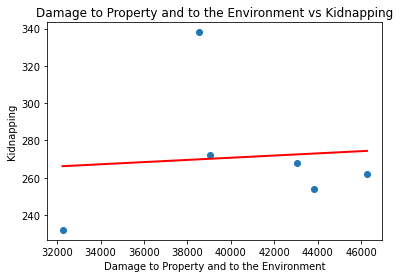

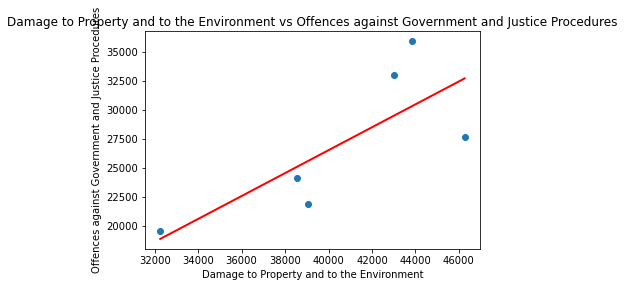

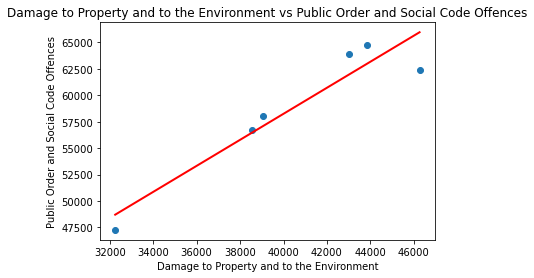

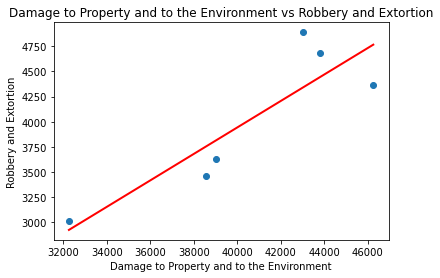

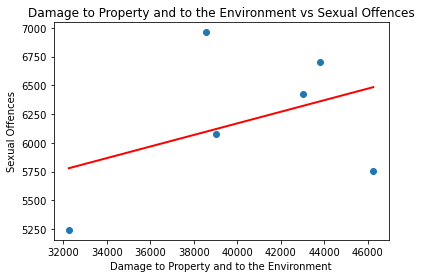

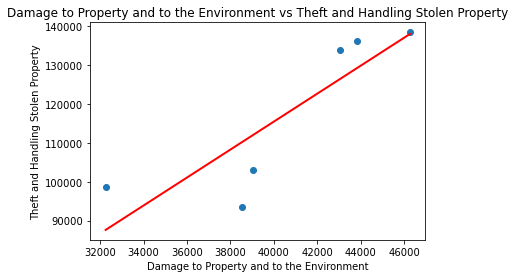

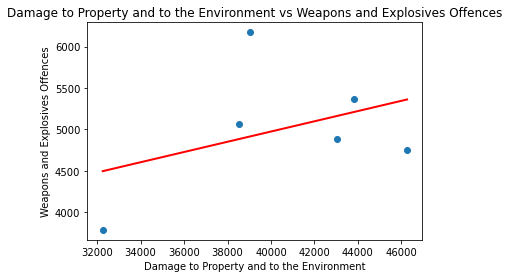

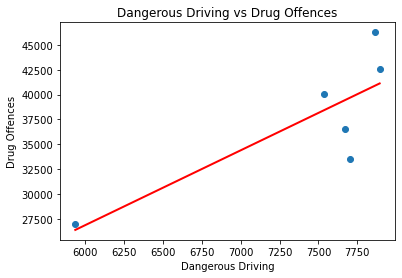

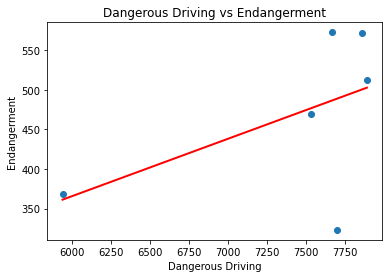

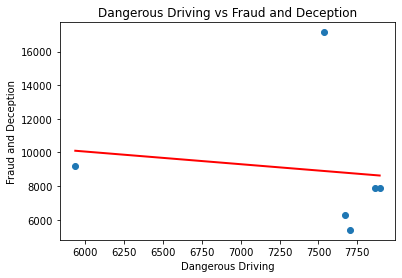

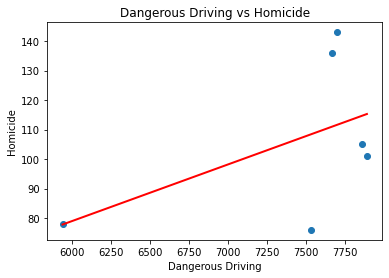

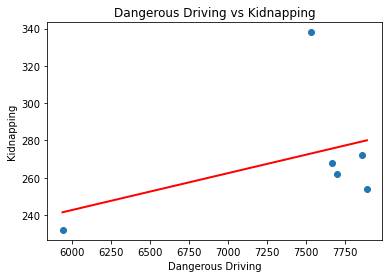

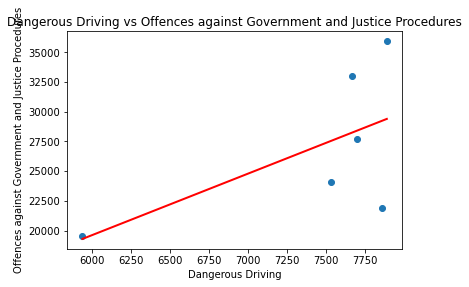

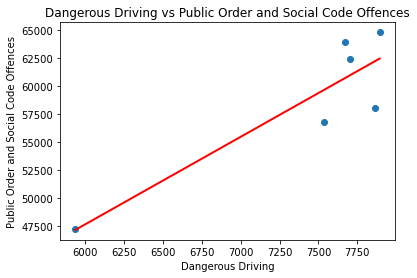

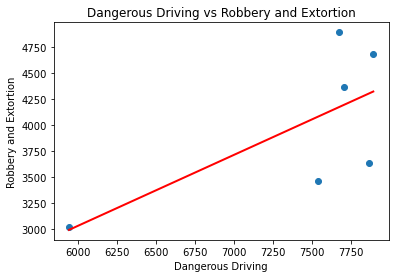

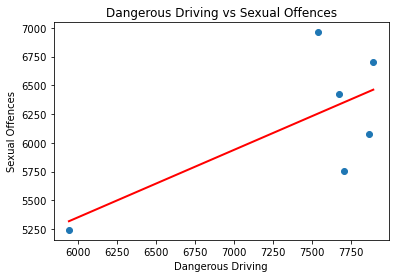

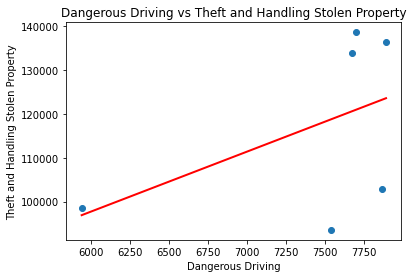

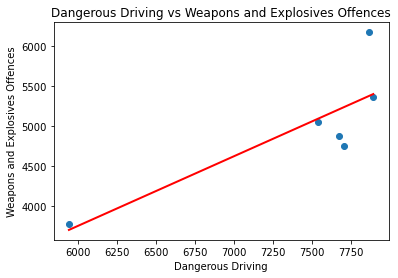

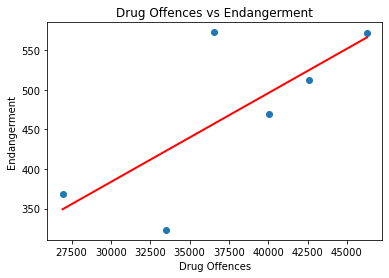

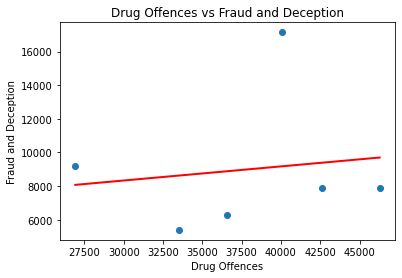

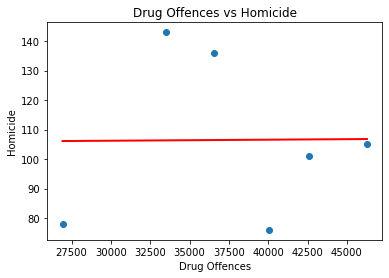

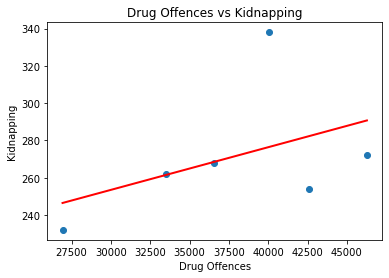

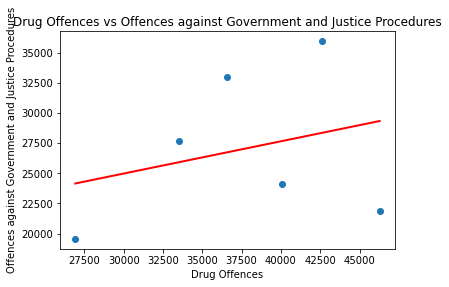

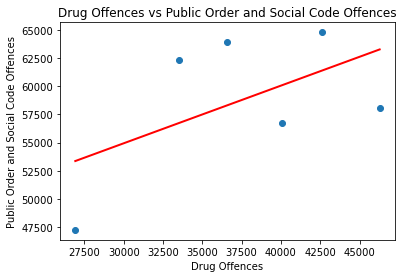

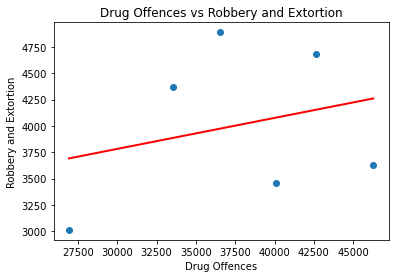

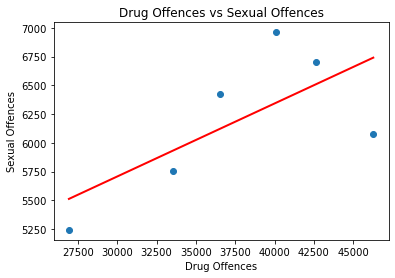

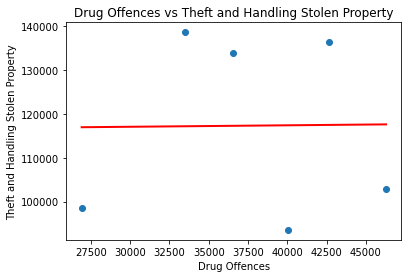

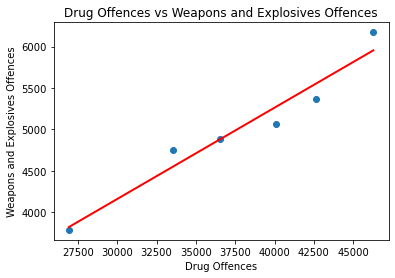

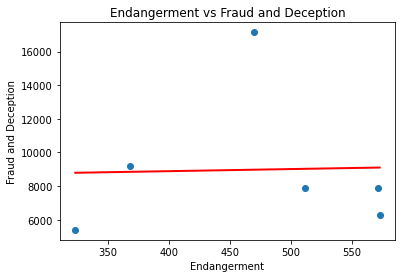

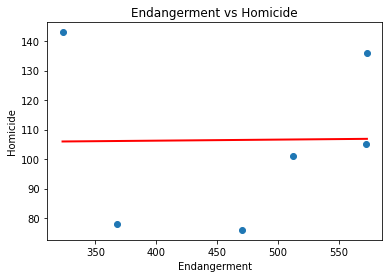

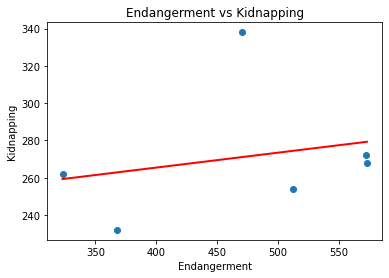

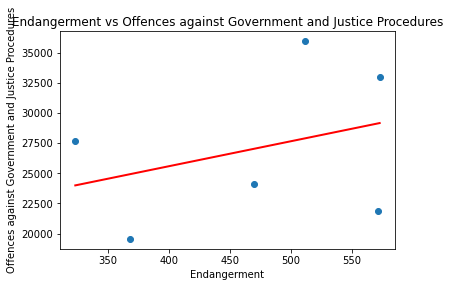

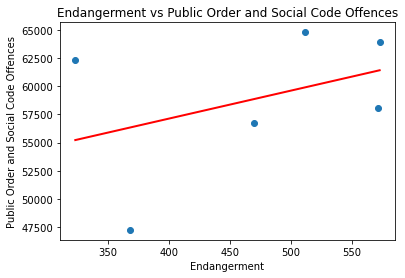

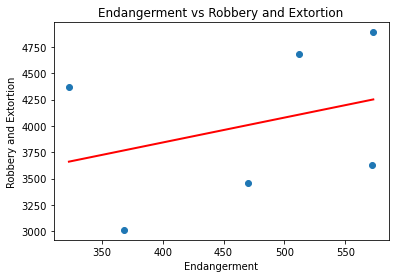

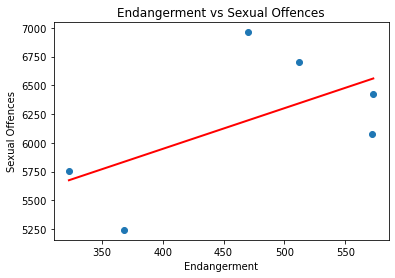

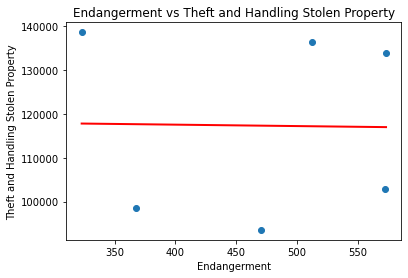

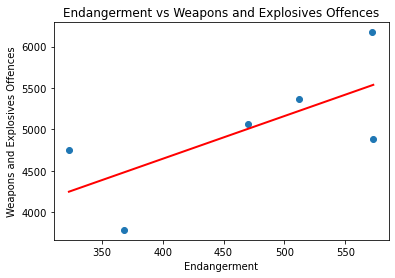

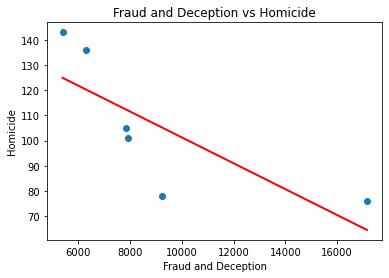

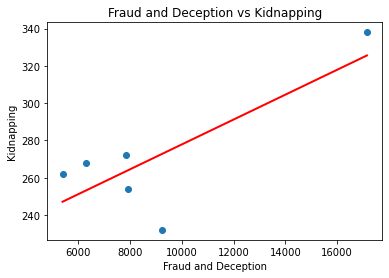

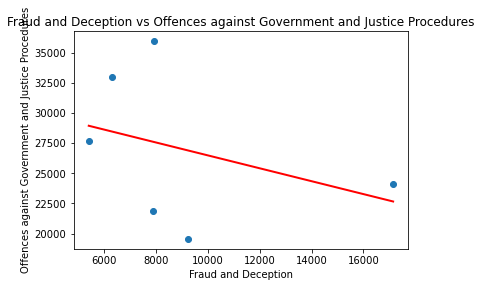

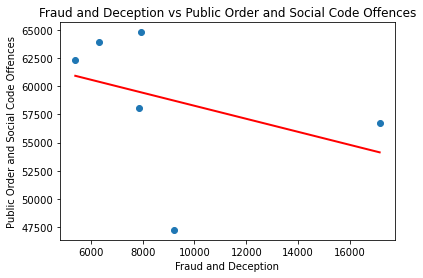

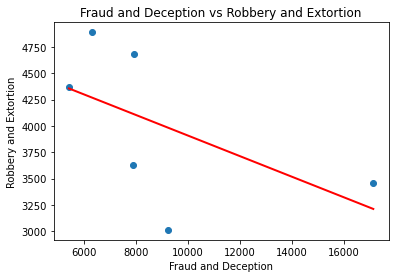

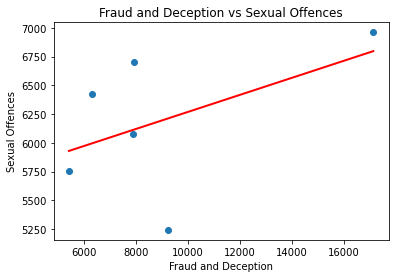

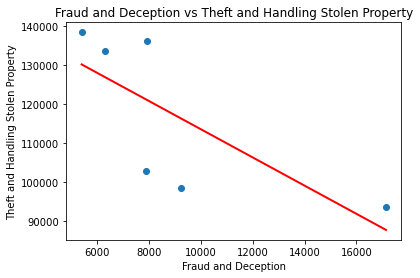

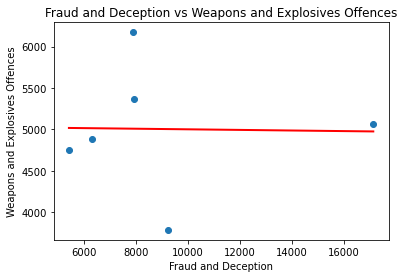

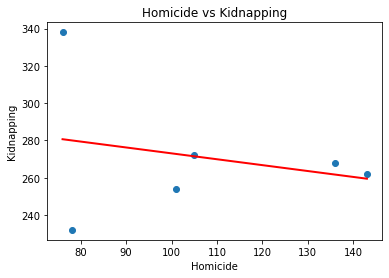

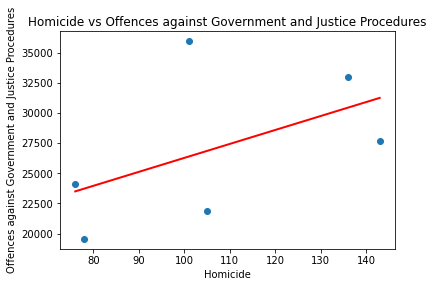

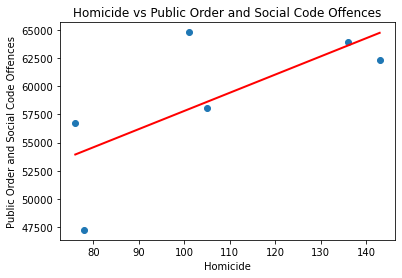

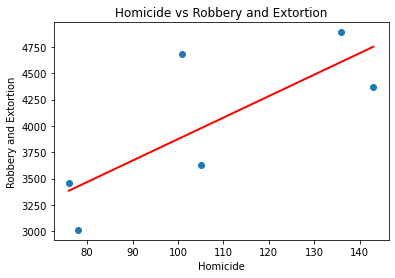

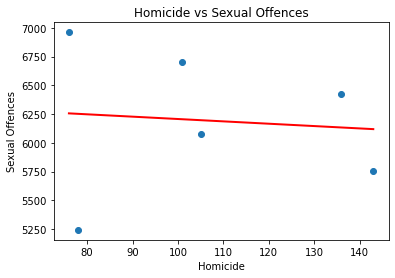

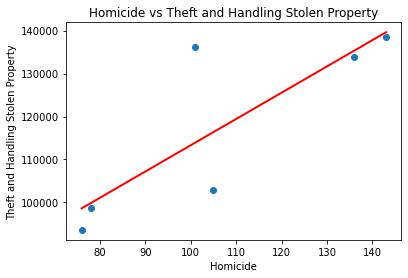

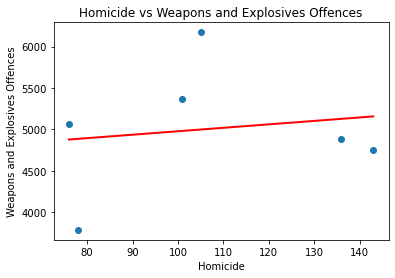

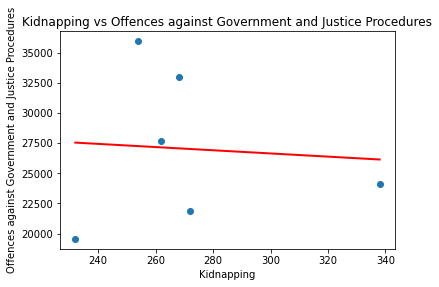

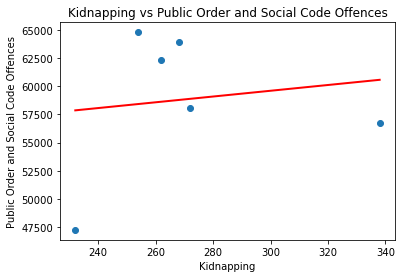

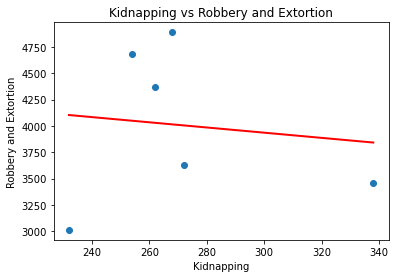

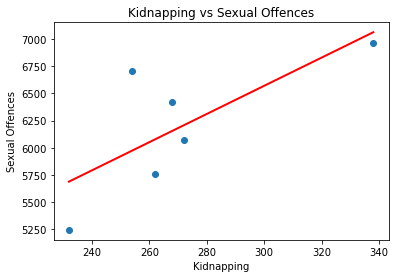

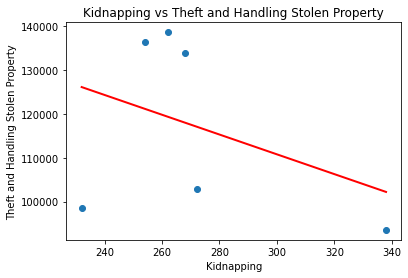

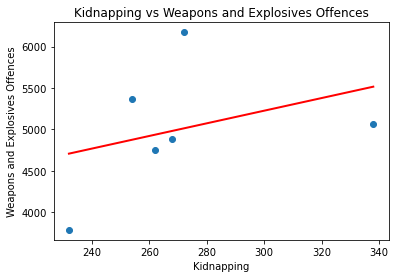

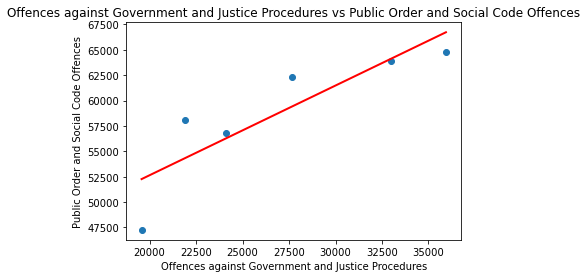

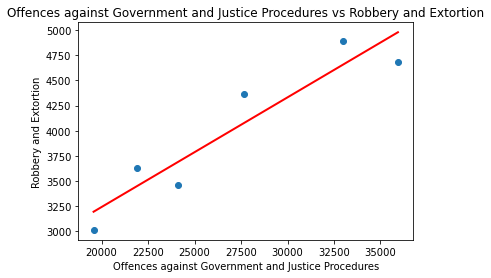

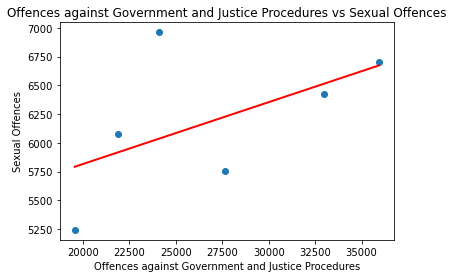

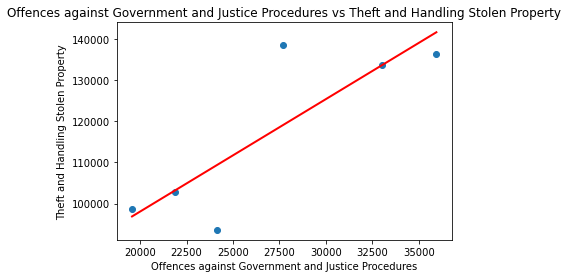

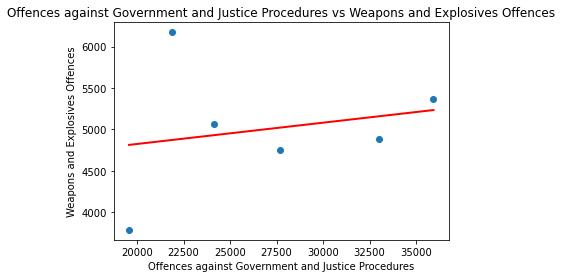

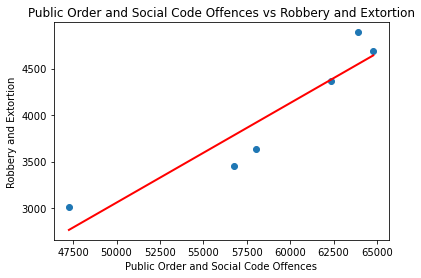

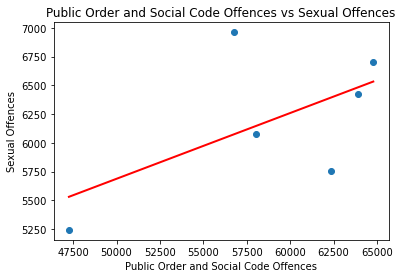

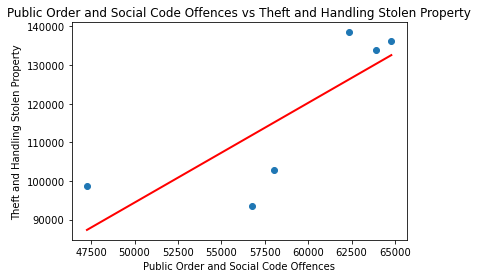

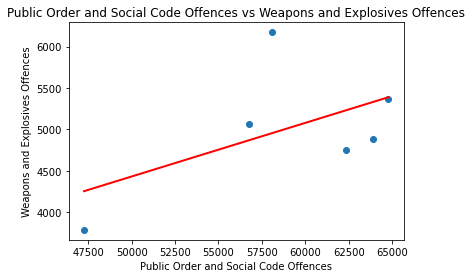

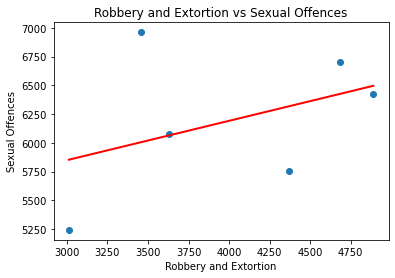

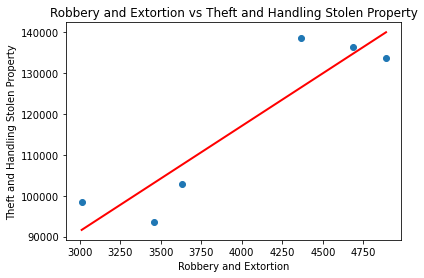

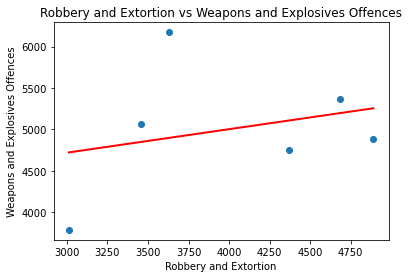

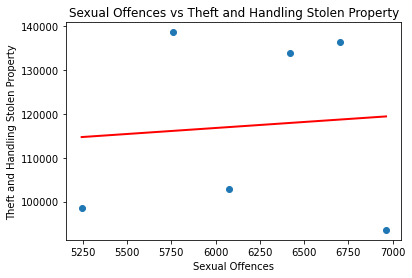

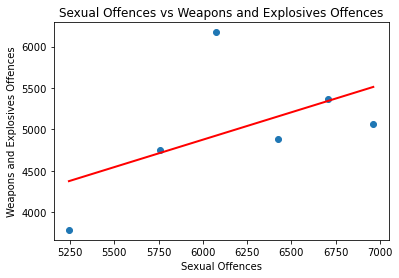

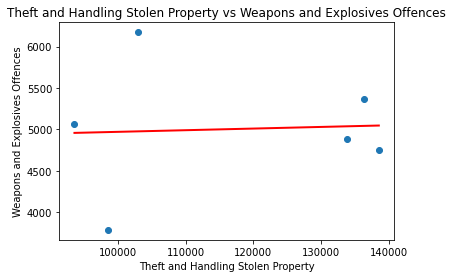

In [34]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Pivot the grouped_data DataFrame to have crime categories as columns
pivot_data = grouped_data.pivot_table(index='Year', columns='Category', values='VALUE')

# Get all unique combinations of crime categories
crime_categories = pivot_data.columns
combinations = list(itertools.combinations(crime_categories, 2))

# Function to create scatterplot with line of best fit
def create_scatterplot(x_data, y_data, x_label, y_label):
    plt.figure()
    plt.scatter(x_data, y_data)

    # Calculate the line of best fit
    slope, intercept = np.polyfit(x_data, y_data, 1)
    x_fit = np.linspace(min(x_data), max(x_data), 2)
    y_fit = slope * x_fit + intercept

    plt.plot(x_fit, y_fit, color='red', linewidth=2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'{x_label} vs {y_label}')
    plt.show()

# Iterate over all combinations and create scatterplots with lines of best fit
for combination in combinations:
    x_label, y_label = combination
    x_data = pivot_data[x_label].dropna()
    y_data = pivot_data[y_label].dropna()

    # Ensure both x_data and y_data have the same length
    common_index = x_data.index.intersection(y_data.index)
    x_data = x_data.loc[common_index]
    y_data = y_data.loc[common_index]

    create_scatterplot(x_data, y_data, x_label, y_label)


Here we are pre-processing the data in preparation to perform a k-means analysis on the data. We are grouping the crime rates by the categories outlined above and then subsequently grouping by year

In [ ]:
import pandas as pd

data = pd.read_csv('recorded_crime_ireland.csv')
data['Year'] = data['Quarter'].apply(lambda x: int(x[:4]))
grouped_data = data.groupby(['Year', 'Type of Offence']).agg({'VALUE': 'sum'}).reset_index()
offence_to_category = {}
for category, offences in crime_dict.items():
    for offence in offences:
        offence_to_category[offence] = category
grouped_data['Category'] = grouped_data['Type of Offence'].map(offence_to_category)
final_data = grouped_data.groupby(['Year', 'Category']).agg({'VALUE': 'sum'}).reset_index()
pivoted_data = final_data.pivot(index='Year', columns='Category', values='VALUE').reset_index()
pivoted_data.fillna(0, inplace=True)  # Replace NaN values with 0

print(pivoted_data)


Category  Year  Assault  Burglary  Child Neglect and Cruelty   
0         2003    27070     51508                        178  \
1         2004    26548     49798                        191   
2         2005    27366     52742                        264   
3         2006    31116     49640                        300   
4         2007    36276     48022                        554   
5         2008    39430     50556                        544   
6         2009    37832     55040                        506   
7         2010    36466     52230                        434   
8         2011    34330     56416                        197   
9         2012    31414     56934                        229   
10        2013    28732     52624                        226   
11        2014    30338     55422                        248   
12        2015    33836     52638                        168   
13        2016    33440     37168                        267   
14        2017    37980     38412       

Let's look at the statistics from the above grouped data

In [ ]:
pivoted_data.describe()

Category        Year       Assault      Burglary  Child Neglect and Cruelty   
count       20.00000     20.000000     20.000000                  20.000000  \
mean      2012.50000  34522.900000  43995.300000                 308.350000   
std          5.91608   4957.409743  13431.559964                 120.955962   
min       2003.00000  26548.000000  14408.000000                 168.000000   
25%       2007.75000  30921.500000  36354.000000                 218.750000   
50%       2012.50000  34926.000000  50177.000000                 276.000000   
75%       2017.25000  38016.000000  52664.000000                 357.750000   
max       2022.00000  43672.000000  56934.000000                 554.000000   

Category  Damage to Property and to the Environment  Dangerous Driving   
count                                     20.000000          20.000000  \
mean                                   61553.400000       10518.150000   
std                                    18657.078195        4399.816961   
min                                    32252.000000        5939.000000   
25%                                    44212.500000        7451.500000   
50%                                    60815.000000        8124.500000   
75%                                    78052.500000       12810.250000   
max                                    88686.000000       19928.000000   

Category  Drug Offences  Endangerment  Fraud and Deception    Homicide   
count         20.000000     20.000000            20.000000   20.000000  \
mean       33948.000000    326.950000          6169.300000  149.200000   
std         7867.267458    117.140705          2971.600209   42.908225   
min        18590.000000    194.000000          3176.000000   76.000000   
25%        29687.000000    234.750000          4891.750000  126.250000   
50%        33134.000000    303.500000          5502.000000  149.000000   
75%        39692.000000    354.500000          6282.750000  169.500000   
max        46708.000000    573.000000         17145.000000  240.000000   

Category  Kidnapping  Offences against Government and Justice Procedures   
count      20.000000                                          20.000000   \
mean      233.000000                                       22090.900000    
std        53.020354                                        5726.637058    
min       148.000000                                       12912.000000    
25%       194.000000                                       18936.500000    
50%       245.000000                                       21856.000000    
75%       265.000000                                       24265.500000    
max       338.000000                                       35940.000000    

Category  Public Order and Social Code Offences  Robbery and Extortion   
count                                 20.000000              20.000000  \
mean                               84085.800000            4874.300000   
std                                25166.966058             865.027234   
min                                47256.000000            3012.000000   
25%                                63527.000000            4398.000000   
50%                                80179.000000            4934.000000   
75%                               110017.500000            5472.000000   
max                               124148.000000            6474.000000   

Category  Sexual Offences  Theft and Handling Stolen Property   
count           20.000000                           20.000000  \
mean          4373.000000                       139944.100000   
std           1421.424823                        19519.637286   
min           2538.000000                        93576.000000   
25%           3113.500000                       135673.000000   
50%           3948.500000                       147924.000000   
75%           5371.750000                       153296.500000   
max           6962.000000                       156854.000000   

Category  Weapon

Let's disregard the year since statistics shouldn't be relevant to the 'Year' column.

In [ ]:
selected_columns = [col for col in pivoted_data.columns if col != 'Year']
descriptive_stats = pivoted_data[selected_columns].describe()
print(descriptive_stats)

Category       Assault      Burglary  Child Neglect and Cruelty   
count        20.000000     20.000000                  20.000000  \
mean      34522.900000  43995.300000                 308.350000   
std        4957.409743  13431.559964                 120.955962   
min       26548.000000  14408.000000                 168.000000   
25%       30921.500000  36354.000000                 218.750000   
50%       34926.000000  50177.000000                 276.000000   
75%       38016.000000  52664.000000                 357.750000   
max       43672.000000  56934.000000                 554.000000   

Category  Damage to Property and to the Environment  Dangerous Driving   
count                                     20.000000          20.000000  \
mean                                   61553.400000       10518.150000   
std                                    18657.078195        4399.816961   
min                                    32252.000000        5939.000000   
25%                       

We need to get the col names in order to perform a min-max normalisation of the dataset

In [ ]:
pivoted_data.columns

Index(['Year', 'Assault', 'Burglary', 'Child Neglect and Cruelty',
       'Damage to Property and to the Environment', 'Dangerous Driving',
       'Drug Offences', 'Endangerment', 'Fraud and Deception', 'Homicide',
       'Kidnapping', 'Offences against Government and Justice Procedures',
       'Public Order and Social Code Offences', 'Robbery and Extortion',
       'Sexual Offences', 'Theft and Handling Stolen Property',
       'Weapons and Explosives Offences'],
      dtype='object', name='Category')

We are normalising the data using minmax function offered by the scikit-learn module (for ml). We could ahve used Z score normalisation but opted not to for simplicity. This is so we can remove outliers and any data abnormalities that might skew a k-mean analysis.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

cols_to_normalize = [ 'Assault', 'Burglary', 'Child Neglect and Cruelty',
       'Damage to Property and to the Environment', 'Dangerous Driving',
       'Drug Offences', 'Endangerment', 'Fraud and Deception', 'Homicide',
       'Kidnapping', 'Offences against Government and Justice Procedures',
       'Public Order and Social Code Offences', 'Robbery and Extortion',
       'Sexual Offences', 'Theft and Handling Stolen Property',
       'Weapons and Explosives Offences']
scaler = MinMaxScaler()
normalized_cols = scaler.fit_transform(pivoted_data[cols_to_normalize])
pivoted_data[cols_to_normalize] = normalized_cols
print(pivoted_data)



Category  Year   Assault  Burglary  Child Neglect and Cruelty   
0         2003  0.030484  0.872407                   0.025907  \
1         2004  0.000000  0.832197                   0.059585   
2         2005  0.047769  0.901425                   0.248705   
3         2006  0.266760  0.828481                   0.341969   
4         2007  0.568092  0.790434                   1.000000   
5         2008  0.752278  0.850021                   0.974093   
6         2009  0.658958  0.955463                   0.875648   
7         2010  0.579187  0.889385                   0.689119   
8         2011  0.454450  0.987819                   0.075130   
9         2012  0.284163  1.000000                   0.158031   
10        2013  0.127540  0.898650                   0.150259   
11        2014  0.221327  0.964445                   0.207254   
12        2015  0.425601  0.898979                   0.000000   
13        2016  0.402476  0.535202                   0.256477   
14        2017  0.667601 

Here is the normalised data using z-score normalisation. Note: We will continue with the min-max method of normalisation from here on.

In [ ]:
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt


crime_rates_standardized = preprocessing.scale(pivoted_data)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[-1.64750894 -1.54244141  0.57386242 -1.1056609   0.35714697  0.25856896
  -2.0028524  -1.16444426 -0.87430502  0.04303979 -0.75467538 -1.5086797
   0.25259966  1.12403361 -0.88708694  0.36151166 -1.35121872]
 [-1.47408695 -1.65047377  0.44324297 -0.99539169  0.68863497  0.424831
  -1.84140356 -1.12941021 -1.03347045  0.4734377  -1.64480533 -1.6444822
   0.46768565  0.66146834 -1.02278453  0.23231588 -1.00027173]
 [-1.30066495 -1.48118168  0.66812231 -0.37618766  0.98327875  0.87254927
  -0.94626234 -0.84037929 -0.83908837  1.35814451 -1.64480533 -1.16756104
   1.0959846  -0.03356563 -0.90441004  0.32114455 -0.42069952]
 [-1.12724296 -0.7050871   0.43117404 -0.07082676  1.40913194  1.91489337
  -0.71569566 -0.92796442 -0.6322769   1.64507645 -1.33519491 -0.56057048
   1.18673164  0.12299492 -1.07619742  0.47735686  0.40934107]
 [-0.95382097  0.36281904  0.30758207  2.08366399  1.37459736  2.19425092
   0.40375251 -0.31486853  0.03614885  2.17111833 -0.32896107 -0.04674257
   1.5211830

This is used to see how many clusters we will implement to perform the k-means analysis. This is denoted as the 'Elbow method'. It is clear from the graph that it appears to start to level off around N = 3. WCSS stands for Within-Cluster Sum of Squares. It is a measure of the variance or spread of the data within each cluster. It measures the sum of the squared Euclidean distances between each data point and the centroid of its assigned cluster. For an efficient K-means algorithm we want to choose this carefully. You can see that adding more clusters will be 'better' however, this is a dire overfit of the data since intuitively, the more points the less variance (which will provide no meaningful insights into the data)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

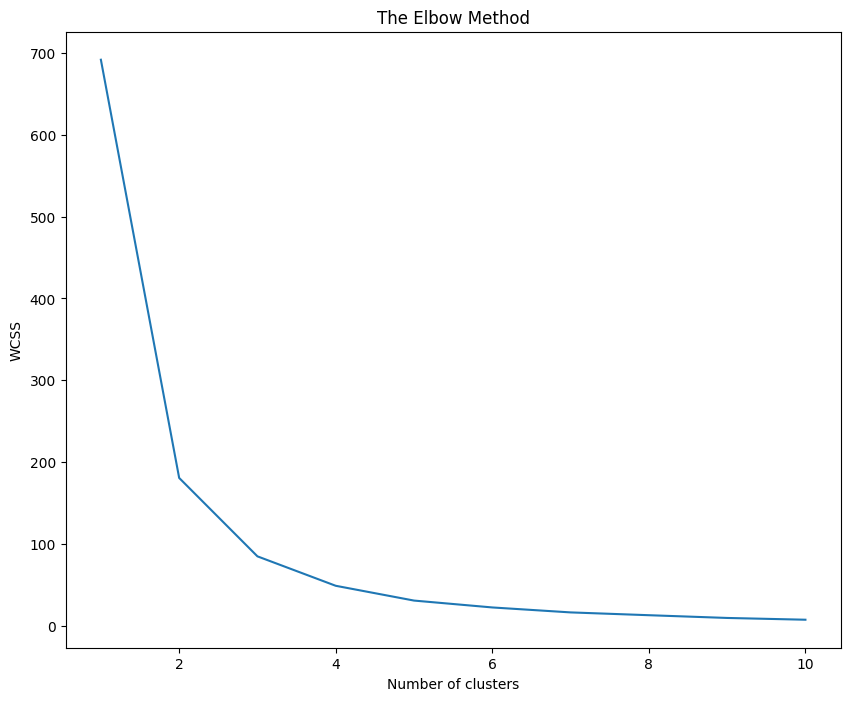

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = [] # Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 7)
    kmeans.fit(pivoted_data) # It is normalised at this stage - the cell two above has been ran before this 
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we are fitting the k-means algorithm with 3 clusters, the k-means++ method of initialisation (so that we don't run into a meaningless square) - all that means is we randomly choose the first cluster to pivot to and the random_state for the ability to reproduce this. We are then fitting the cols to the clusters which is the output - indicating which cluster they belong to.

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(pivoted_data)

y_kmeans

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])

Here we are first adding one to the array as we don't want 0 to be a cluster rather '1'. Then we are adding this to our original dataset (in this case pivoted_data)

In [ ]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)
pivoted_data['cluster'] = cluster

Here we are creating a download link to download the data. Note: the data is clustered by year. We want to identify the similar years through an unsupervised method.

In [ ]:
from IPython.display import HTML
import base64

df = pivoted_data
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

Printing the head to see the best way of visualising this dataset

In [ ]:
pivoted_data.head

<bound method NDFrame.head of Category  Year   Assault  Burglary  Child Neglect and Cruelty   
0         2003  0.030484  0.872407                   0.025907  \
1         2004  0.000000  0.832197                   0.059585   
2         2005  0.047769  0.901425                   0.248705   
3         2006  0.266760  0.828481                   0.341969   
4         2007  0.568092  0.790434                   1.000000   
5         2008  0.752278  0.850021                   0.974093   
6         2009  0.658958  0.955463                   0.875648   
7         2010  0.579187  0.889385                   0.689119   
8         2011  0.454450  0.987819                   0.075130   
9         2012  0.284163  1.000000                   0.158031   
10        2013  0.127540  0.898650                   0.150259   
11        2014  0.221327  0.964445                   0.207254   
12        2015  0.425601  0.898979                   0.000000   
13        2016  0.402476  0.535202                   0.25647

Here we are using a technique called PCA to allow for 2d plotting. What it does is take the two features whihc accounted for the most variability in the data and creates a scatter plot based on those features. We have labelled it by year as that was the clustering. There seems to be some notable changes in the crime rates in the years 2009 and 2016. It would be interesting to see if there were any extraneous factors that led to this ?

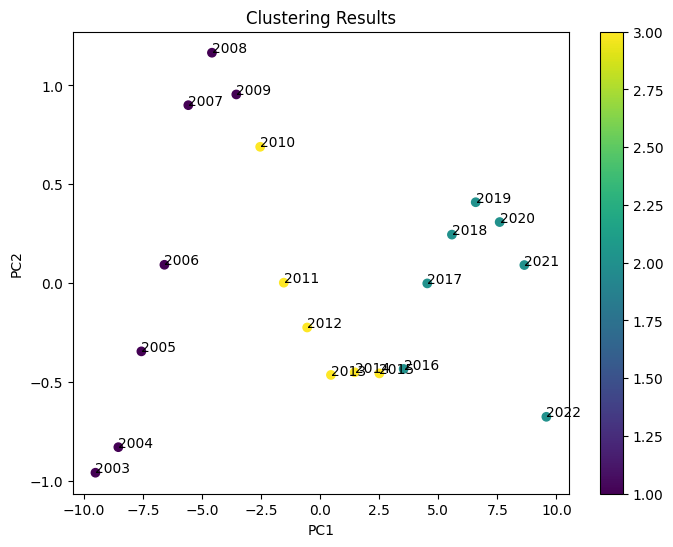

In [ ]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(pivoted_data.iloc[:, :-1])  # Exclude the last column (cluster labels)

plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=pivoted_data['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results')

for i, year in enumerate(pivoted_data['Year']):
    plt.annotate(year, (data_2d[i, 0], data_2d[i, 1]))

plt.colorbar()
plt.show()


Here we are going to visualise the three data points 

First we will choose the most prominent features in our dataset and from visual inspection a lot of the crimes are grouped under the 'Burglary', 'Drug Offences' and 'Assualt' categories

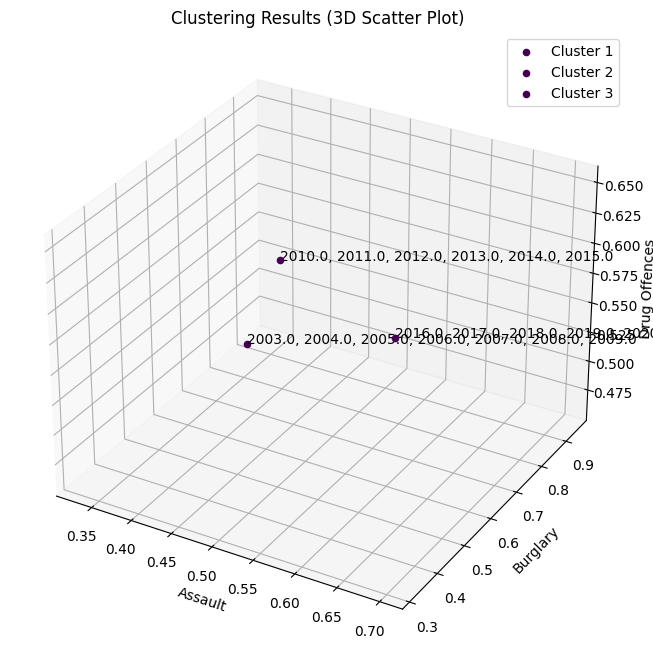

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

cluster_means = pivoted_data.groupby('cluster').mean()
year_values = pivoted_data.groupby('cluster').apply(lambda x: pd.Series(x['Year'].values))
year_values = year_values.unstack()


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i, cluster in enumerate(cluster_means.index):
    ax.scatter(cluster_means.loc[cluster, 'Assault'], cluster_means.loc[cluster, 'Burglary'], cluster_means.loc[cluster, 'Drug Offences'], c=cluster_means.index[i], label=f'Cluster {cluster}')
    year_label = ', '.join(str(y) for y in year_values.loc[cluster].dropna().values)
    ax.text(cluster_means.loc[cluster, 'Assault'], cluster_means.loc[cluster, 'Burglary'], cluster_means.loc[cluster, 'Drug Offences'], year_label, fontsize=10)

ax.set_xlabel('Assault')
ax.set_ylabel('Burglary')
ax.set_zlabel('Drug Offences')
ax.set_title('Clustering Results (3D Scatter Plot)')

plt.legend()

plt.show()


The three most varying features (judged by standard deviation)

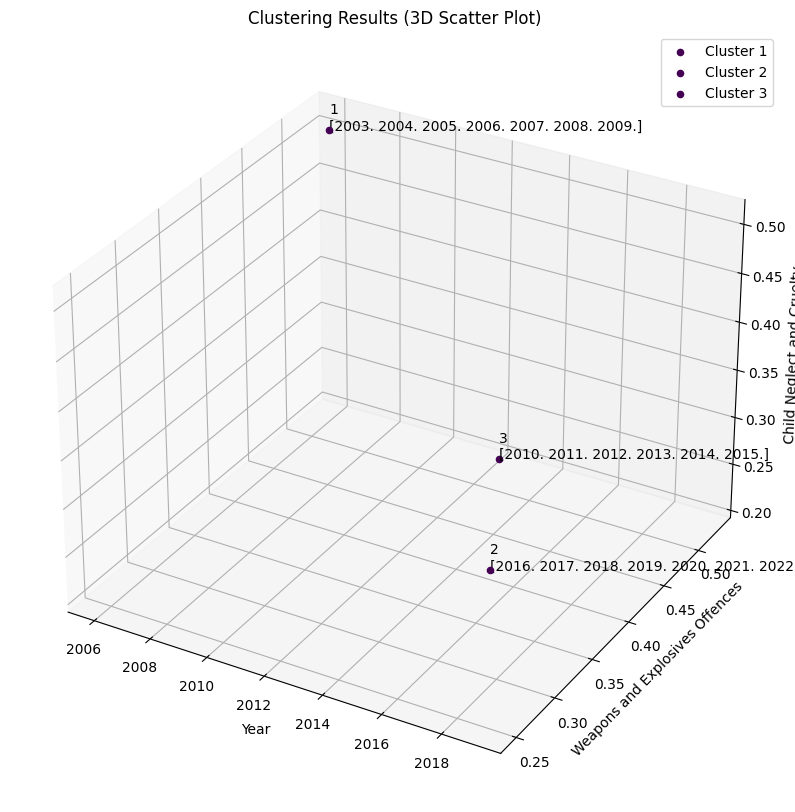

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

cluster_std = pivoted_data.groupby('cluster').std()
category_names = cluster_std.mean().sort_values(ascending=False)[:3].index

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i, cluster in enumerate(cluster_means.index):
    ax.scatter(cluster_means.loc[cluster, category_names[0]], cluster_means.loc[cluster, category_names[1]], cluster_means.loc[cluster, category_names[2]], c=cluster_means.index[i], label=f'Cluster {cluster}')
    ax.text(cluster_means.loc[cluster, category_names[0]], cluster_means.loc[cluster, category_names[1]], cluster_means.loc[cluster, category_names[2]], f'{cluster_means.index[i]}\n{year_values.loc[cluster].dropna().values}', fontsize=10)

ax.set_xlabel(category_names[0])
ax.set_ylabel(category_names[1])
ax.set_zlabel(category_names[2])
ax.set_title('Clustering Results (3D Scatter Plot)')

plt.legend()

plt.show()


The three least varying features (judged by standard deviation)

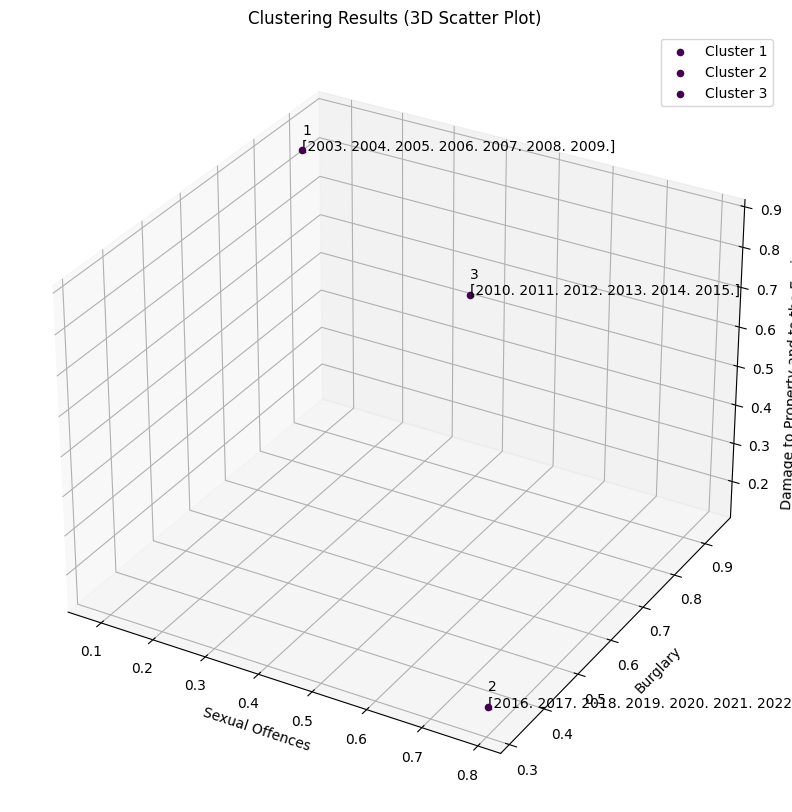

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

cluster_std = pivoted_data.groupby('cluster').std()
category_names = cluster_std.mean().sort_values(ascending=True)[:3].index

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for i, cluster in enumerate(cluster_means.index):
    ax.scatter(cluster_means.loc[cluster, category_names[0]], cluster_means.loc[cluster, category_names[1]], cluster_means.loc[cluster, category_names[2]], c=cluster_means.index[i], label=f'Cluster {cluster}')
    ax.text(cluster_means.loc[cluster, category_names[0]], cluster_means.loc[cluster, category_names[1]], cluster_means.loc[cluster, category_names[2]], f'{cluster_means.index[i]}\n{year_values.loc[cluster].dropna().values}', fontsize=10)

ax.set_xlabel(category_names[0])
ax.set_ylabel(category_names[1])
ax.set_zlabel(category_names[2])
ax.set_title('Clustering Results (3D Scatter Plot)')

plt.legend()

plt.show()


We can repeat the same analysis above done on crime type instead of by year. Let's print the head to see where we are and drop the old cluster columns

Remove year col 

In [ ]:
pivoted_data = pivoted_data.drop('cluster', axis=1)

In [ ]:
pivoted_data = pivoted_data.drop('Year', axis=1)

Let's transpose the data so we are working with the type of crime as the index and not the year

In [ ]:

pivoted_data_transpose = pivoted_data.transpose()
pivoted_data_transpose.head

<bound method NDFrame.head of                                                           0         1    
Category                                                                 
Assault                                             0.030484  0.000000  \
Burglary                                            0.872407  0.832197   
Child Neglect and Cruelty                           0.025907  0.059585   
Damage to Property and to the Environment           0.634298  0.741114   
Dangerous Driving                                   0.406605  0.457574   
Drug Offences                                       0.000000  0.044029   
Endangerment                                        0.000000  0.010554   
Fraud and Deception                                 0.033002  0.000000   
Homicide                                            0.457317  0.567073   
Kidnapping                                          0.242105  0.000000   
Offences against Government and Justice Procedures  0.032916  0.000000   
Public O

Elbow Method yields 4 clusters as the most optimal

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

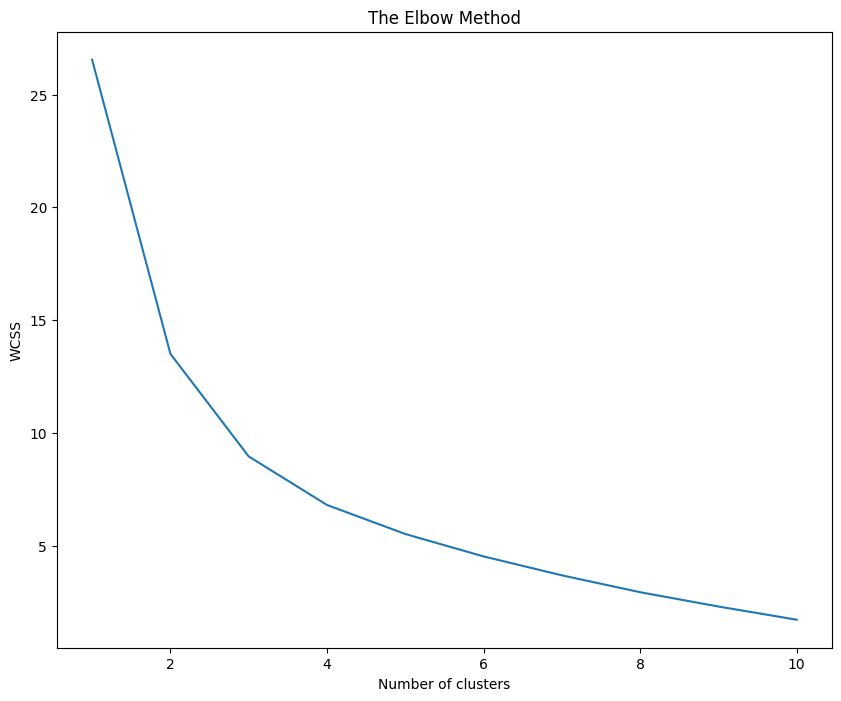

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = [] # Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 7)
    kmeans.fit(pivoted_data_transpose) # It is normalised at this stage - the cell above has been ran before this 
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(pivoted_data_transpose)

y_kmeans

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 3, 1, 3, 0])

In [ ]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)
pivoted_data_transpose['cluster'] = cluster

In [ ]:
from IPython.display import HTML
import base64

df = pivoted_data_transpose
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)

This is interesting to see. Drugs and weapons are similar and behave very similarly to each other -> More drugs leads to higher volumes of weapon offences

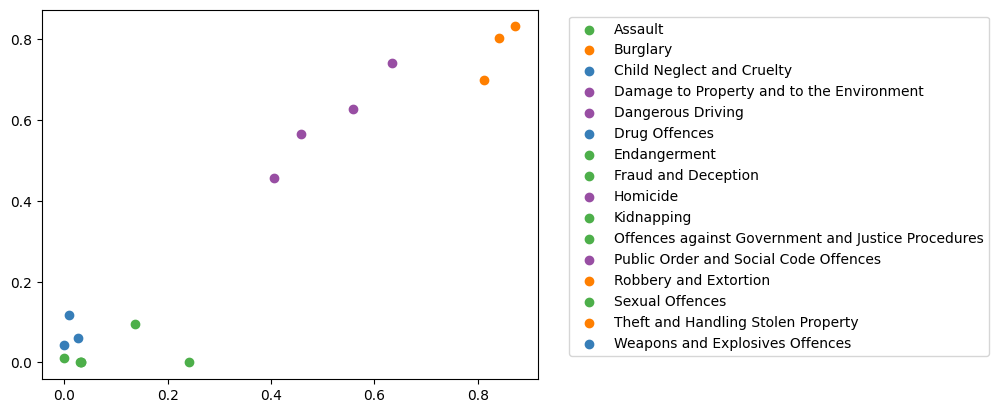

In [ ]:
import matplotlib.pyplot as plt

category_names = pivoted_data_transpose.index.tolist()
colors = pivoted_data_transpose['cluster'].tolist()

fig, ax = plt.subplots()
for i in range(len(category_names)):
    x = pivoted_data_transpose.loc[category_names[i], 0]
    y = pivoted_data_transpose.loc[category_names[i], 1]
    ax.scatter(x, y, color=plt.cm.Set1(colors[i]), label=category_names[i])
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Let's plot this as parallel coordinates to visualise the individual features

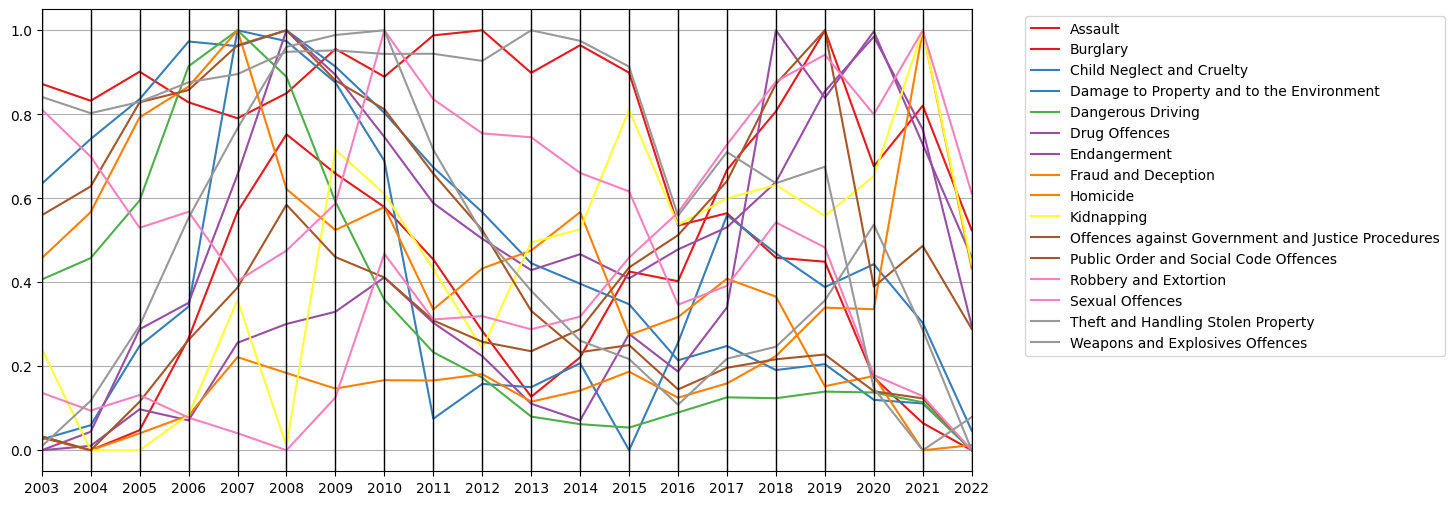

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Assume pivoted_data_transpose is a Pandas DataFrame with the PCA results and cluster labels
# Assume category_names is a list of category names in the same order as in pivoted_data_transpose
category_names = ['Assault', 'Burglary', 'Child Neglect and Cruelty',
       'Damage to Property and to the Environment', 'Dangerous Driving',
       'Drug Offences', 'Endangerment', 'Fraud and Deception', 'Homicide',
       'Kidnapping', 'Offences against Government and Justice Procedures',
       'Public Order and Social Code Offences', 'Robbery and Extortion',
       'Sexual Offences', 'Theft and Handling Stolen Property',
       'Weapons and Explosives Offences']
class_column = 'cluster'

# Drop the 'cluster' column if it exists
if class_column in pivoted_data_transpose.columns:
    pivoted_data_transpose = pivoted_data_transpose.drop(class_column, axis=1)

# Add the class column back to the DataFrame
pivoted_data_transpose[class_column] = pivoted_data_transpose.index.map(lambda x: category_names.index(x))

# Replace the class labels with the category names
pivoted_data_transpose[class_column] = pivoted_data_transpose[class_column].replace(dict(enumerate(category_names)))

# Create the parallel coordinates plot
fig, ax = plt.subplots(figsize=(12, 6))
parallel_coordinates(pivoted_data_transpose, class_column=class_column, colormap='Set1')
ax.set_xticklabels(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


We need to reset the cluster col back to the original (we use the same random_state to achieve this)

In [ ]:
pivoted_data_transpose = pivoted_data_transpose.drop('cluster', axis=1)

In [ ]:
pivoted_data_transpose.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='object')

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 7)
y_kmeans = kmeans.fit_predict(pivoted_data_transpose)

y_kmeans

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 3, 1, 3, 0])

In [ ]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)
pivoted_data_transpose['cluster'] = cluster

We will now visualise the parallel lines to visualise it by cluster as deemed by the k-means algorithm

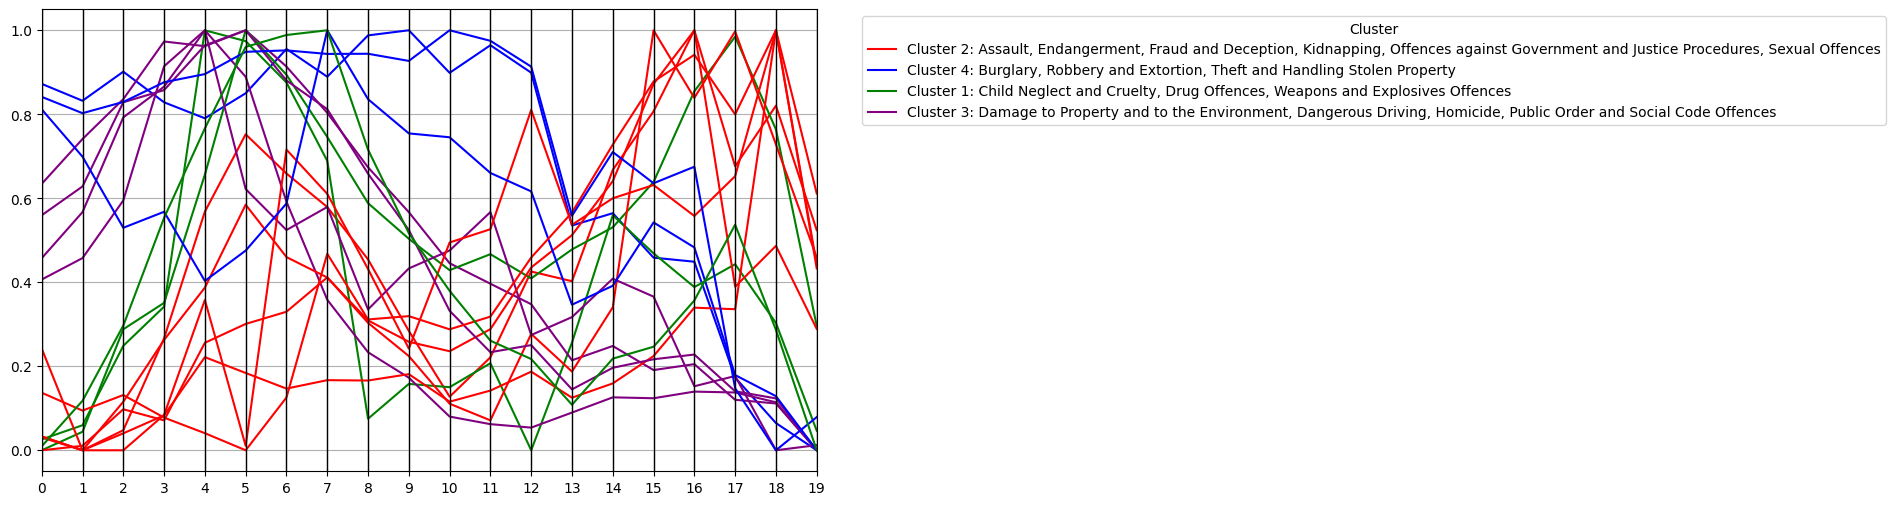

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates

def get_categories_by_cluster(pivoted_data_transpose):
    categories_by_cluster = {}
    for i in range(len(pivoted_data_transpose)):
        cluster = pivoted_data_transpose.iloc[i, -1]
        category = pivoted_data_transpose.index[i]
        if cluster not in categories_by_cluster:
            categories_by_cluster[cluster] = []
        categories_by_cluster[cluster].append(str(category))
    result = [f'Cluster {i}: {", ".join(categories)}' for i, categories in categories_by_cluster.items()]
    return result

cmap = colors.ListedColormap(['red', 'blue', 'green', 'purple'])

fig, ax = plt.subplots(figsize=(10, 6))

parallel_coordinates(pivoted_data_transpose, 'cluster', ax=ax, colormap=cmap)

handles, labels = ax.get_legend_handles_labels()
cluster_labels = ['Cluster ' + str(i + 1) for i in range(len(labels))]
category_labels = [', '.join(pivoted_data_transpose.index[pivoted_data_transpose['cluster']==i]) for i in range(len(labels))]
legend_labels = get_categories_by_cluster(pivoted_data_transpose)
ax.legend(title='Cluster', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [11]:
crime_dict = {
    'Homicide': ['Homicide offences', 'Murder', 'Manslaughter', 'Infanticide'],
    'Dangerous Driving': ['Dangerous driving leading to death', 'Dangerous driving causing serious bodily harm', 'Driving/in charge of a vehicle while over legal alcohol limit', 'Driving/in charge of a vehicle under the influence of drugs'],
    'Sexual Offences': ['Sexual offences', 'Rape and sexual assault', 'Other sexual offences'],
    'Assault': ['Attempts/threats to murder, assaults, harassments and related offences', 'Murder-attempt', 'Threat to kill or cause serious harm', 'Harassment and related offences', 'Assault causing harm, poisoning', 'Other assault'],
    'Endangerment': ['Endangerment with potential for serious harm/death', 'Unseaworthy/dangerous use of boat or ship', 'Endangering traffic offences'],
    'Child Neglect and Cruelty': ['Abandoning a child, child neglect and cruelty'],
    'Kidnapping': ['Kidnapping and related offences', 'False imprisonment', 'Abduction of person under 16 years of age', 'Human trafficking offences'],
    'Robbery and Extortion': ['Robbery, extortion and hijacking offences', 'Robbery of an establishment or institution', 'Robbery of cash or goods in transit', 'Robbery from the person', 'Blackmail or extortion', 'Carjacking, hijacking/unlawful seizure of aircraft/vessel'],
    'Burglary': ['Burglary and related offences', 'Aggravated burglary', 'Burglary (not aggravated)', 'Possession of an article (with intent to burgle, steal, demand)'],
    'Theft and Handling Stolen Property': ['Theft and related offences', 'Theft/taking of vehicle and related offences', 'Theft from person', 'Theft from shop', 'Other thefts, handling stolen property'],
    'Fraud and Deception': ['Fraud, deception and related offences'],
    'Drug Offences': ['Controlled drug offences', 'Importation of drugs', 'Cultivation or manufacture of drugs', 'Possession of drugs for sale or supply', 'Possession of drugs for personal use', 'Other drug offences'],
    'Weapons and Explosives Offences': ['Weapons and Explosives Offences', 'Explosives, chemical weapons offences', 'Discharging a firearm', 'Possession of a firearm', 'Offensive weapons offences (n.e.c.)', 'Fireworks offences'],
    'Damage to Property and to the Environment': ['Damage to property and to the environment', 'Arson', 'Criminal damage (not arson)', 'Litter offences'],
    'Public Order and Social Code Offences': ['Public order and other social code offences', 'Disorderly conduct', 'Trespass offences', 'Liquor licensing offences', 'Prostitution offences', 'Regulated betting/money, collection/trading offences', 'Social code offences (n.e.c.)'],
    'Offences against Government and Justice Procedures': ['Offences against government, justice procedures and organisation of crime', 'Offences against government and its agents', 'Organisation of crime and conspiracy to commit crime', 'Perverting the course of justice', 'Offences while in custody, breach of court orders']
}



Let's try to predict crime rates in certain geographic areas using some ml techniques and libraries

First, we must prepare the data so that we can train a model. This involves dividing up the different crime categories by geographic region

In [22]:
import pandas as pd

unprocessed_data = pd.read_csv('recorded_crime_ireland.csv')
unprocessed_data['Quarter'] = pd.to_datetime(unprocessed_data['Quarter'].str.replace('Q', '-'), format='%Y-%m')
unprocessed_data.set_index('Quarter', inplace=True)
unprocessed_data.index = unprocessed_data.index.to_period('Y').to_timestamp()

crime_category = {subcat: cat for cat, subcats in crime_dict.items() for subcat in subcats} # Inverting the dictionary
unprocessed_data['Category'] = unprocessed_data['Type of Offence'].replace(crime_category)
agg_data = unprocessed_data.groupby(['Garda Division', 'Category', pd.Grouper(freq='Y')])['VALUE'].sum().reset_index()
agg_data['Year'] = agg_data['Quarter'].dt.year
agg_data.drop('Quarter', axis=1, inplace=True)
agg_data


Garda Division                         Category  VALUE   
0      Cavan/Monaghan Garda Division                          Assault   1192  \
1      Cavan/Monaghan Garda Division                          Assault   1260   
2      Cavan/Monaghan Garda Division                          Assault   1352   
3      Cavan/Monaghan Garda Division                          Assault   1442   
4      Cavan/Monaghan Garda Division                          Assault   1628   
...                              ...                              ...    ...   
10075         Wicklow Garda Division  Weapons and Explosives Offences     76   
10076         Wicklow Garda Division  Weapons and Explosives Offences     56   
10077         Wicklow Garda Division  Weapons and Explosives Offences    112   
10078         Wicklow Garda Division  Weapons and Explosives Offences     74   
10079         Wicklow Garda Division  Weapons and Explosives Offences     42   

       Year  
0      2003  
1      2004  
2      2005  
3      2006  
4      2007  
...     ...  
10075  2018  
10076  2019  
10077  2020  
10078  2021  
10079  2022  

[10080 rows x 4 columns]

Now we are going to preprocess the data, dividing it into train and test sets and fitting the encoders

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

garda_station_encoder = LabelEncoder()
category_encoder = LabelEncoder()

agg_data['Garda Division'] = garda_station_encoder.fit_transform(agg_data['Garda Division'])
agg_data['Category'] = category_encoder.fit_transform(agg_data['Category'])

X = agg_data[['Garda Division', 'Category', 'Year']]
y = agg_data['VALUE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Let's train the model

In [28]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Let's evaluate the performance of the model. The model is wrong by about 139 units on average which is quite high. However, further optimisation could reduce this figure down significantly. The model's evaluation indicates that it has substantial errors in it - which is assumed since the data is number one: not large enough to form any sort of accurate model inference and number 2: heavily subject to external factors 

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 139.9889500051818
Mean Squared Error: 78833.8395773654
Root Mean Squared Error: 280.7736447342688


In [35]:
import itertools
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

garda_division_encoder = LabelEncoder()
category_encoder = LabelEncoder()

garda_divisions = ['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division']

categories = list(crime_dict.keys())
combinations = list(itertools.product(garda_divisions, categories))
predictions_df = pd.DataFrame(combinations, columns=['Garda Division', 'Category'])
predictions_df['Year'] = 2024

garda_division_encoder.fit(X_train['Garda Division'])
category_encoder.fit(X_train['Category'])

predictions_df_encoded = predictions_df.copy()
predictions_df_encoded['Garda Division'] = garda_division_encoder.fit_transform(predictions_df_encoded['Garda Division'])
predictions_df_encoded['Category'] = category_encoder.fit_transform(predictions_df_encoded['Category'])

predictions = model.predict(predictions_df_encoded)

predictions_df['Predicted Crimes'] = predictions

predictions = np.clip(predictions, 0, None)
predictions_df['Predicted Crimes'] = predictions
print(predictions_df)


                    Garda Division   
0    Cavan/Monaghan Garda Division  \
1    Cavan/Monaghan Garda Division   
2    Cavan/Monaghan Garda Division   
3    Cavan/Monaghan Garda Division   
4    Cavan/Monaghan Garda Division   
..                             ...   
443  D.M.R. Western Garda Division   
444  D.M.R. Western Garda Division   
445  D.M.R. Western Garda Division   
446  D.M.R. Western Garda Division   
447  D.M.R. Western Garda Division   

                                              Category  Year  Predicted Crimes  
0                                             Homicide  2024          0.000000  
1                                    Dangerous Driving  2024        365.940247  
2                                      Sexual Offences  2024       1583.631836  
3                                              Assault  2024       1244.314209  
4                                         Endangerment  2024        456.463196  
..                                                 ...   

Let's Visualise the predictions and the largest crime category for the upcoming year 2024

In [15]:
import folium
from geopy.geocoders import Nominatim
import requests

geolocator = Nominatim(user_agent="myGeocoder")

def get_lat_lng(garda_division):
    if garda_division == 'D.M.R. Eastern Garda Division':
        return 53.3627, -6.2501
    elif garda_division == 'D.M.R. Western Garda Division':
        return 53.3466, -6.2971
    elif garda_division == 'D.M.R. Northern Garda Division':
        return 53.3860, -6.2652
    elif garda_division == 'D.M.R. Southern Garda Division':
        return 53.3311, -6.2696
    elif garda_division == 'D.M.R. South Central Garda Division':
        return 53.3382, -6.2674
    elif garda_division == 'D.M.R. North Central Garda Division':
        return 53.3603, -6.2614
    else:
        url = f"http://www.mapquestapi.com/geocoding/v1/address?key=qe0wsF4JzrVd0jklsAt3GxZcfrTSzOPh&location={garda_division},Ireland"
        response = requests.get(url)
        if response.status_code == 200:
            json_response = response.json()
            lat_lng = json_response['results'][0]['locations'][0]['latLng']
            print(lat_lng['lat'], lat_lng['lng'])
            return lat_lng['lat'], lat_lng['lng']
        else:
            return None


map_ireland = folium.Map(location=[53.349805, -6.26031], zoom_start=7)
grouped_predictions = predictions_df.groupby(['Garda Division', 'Category'], as_index=False)['Predicted Crimes'].sum()
grouped_predictions['Rank'] = grouped_predictions.groupby('Garda Division')['Predicted Crimes'].rank(method='dense', ascending=False)
grouped_predictions = grouped_predictions[grouped_predictions['Rank'] == 1]

for index, row in grouped_predictions.iterrows():
    lat_lng = get_lat_lng(row['Garda Division'])
    if lat_lng is not None:
        folium.CircleMarker(
            location=lat_lng,
            radius=5,
            popup=f"{row['Garda Division']}<br>Largest Crime Category: {row['Category']}<br>Predicted Crimes: {row['Predicted Crimes']:.0f}",
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(map_ireland)

map_ireland.save('crime_predictions_map.html')


ModuleNotFoundError: No module named 'folium'

In [ ]:
import folium
from geopy.geocoders import Nominatim
import requests

geolocator = Nominatim(user_agent="myGeocoder")

def get_lat_lng(garda_division):
    if garda_division == 'D.M.R. Eastern Garda Division':
        return 53.3627, -6.2501
    elif garda_division == 'D.M.R. Western Garda Division':
        return 53.3466, -6.2971
    elif garda_division == 'D.M.R. Northern Garda Division':
        return 53.3860, -6.2652
    elif garda_division == 'D.M.R. Southern Garda Division':
        return 53.3311, -6.2696
    elif garda_division == 'D.M.R. South Central Garda Division':
        return 53.3382, -6.2674
    elif garda_division == 'D.M.R. North Central Garda Division':
        return 53.3603, -6.2614
    else:
        url = f"http://www.mapquestapi.com/geocoding/v1/address?key=qe0wsF4JzrVd0jklsAt3GxZcfrTSzOPh&location={garda_division},Ireland"
        response = requests.get(url)
        if response.status_code == 200:
            json_response = response.json()
            lat_lng = json_response['results'][0]['locations'][0]['latLng']
            return lat_lng['lat'], lat_lng['lng']
        else:
            return None

map_ireland = folium.Map(location=[53.349805, -6.26031], zoom_start=7)
grouped_predictions = predictions_df.groupby(['Garda Division', 'Category'], as_index=False)['Predicted Crimes'].sum()

for index, row in grouped_predictions.iterrows():
    lat_lng = get_lat_lng(row['Garda Division'])
    if lat_lng is not None:
        max_row = predictions_df.loc[predictions_df['Garda Division'] == row['Garda Division']]
        total_crimes = max_row['Predicted Crimes'].sum()
        max_row = max_row.sort_values('Predicted Crimes', ascending=False)
        largest_category = max_row.iloc[0]['Category']
        largest_category_percentage = max_row.iloc[0]['Predicted Crimes'] / total_crimes * 100
        popup_text = f"{row['Garda Division']}<br>Largest Crime Category: {largest_category} ({largest_category_percentage:.1f}%)<br>Total Crimes: {total_crimes:.0f}<br>"
        for category in categories:
            popup_text += f"{category}: {max_row.loc[max_row['Category'] == category, 'Predicted Crimes'].values[0]:.0f}<br>"
        folium.CircleMarker(
            location=lat_lng,
            radius=5,
            popup=popup_text,
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(map_ireland)


map_ireland.save('crime_predictions_map_category.html')
